In [2]:
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
%matplotlib inline
from __future__ import print_function
import collections
import math
import numpy as np
import os
import random
import tensorflow as tf
import zipfile
from matplotlib import pylab
from six.moves import range
from six.moves.urllib.request import urlretrieve
from sklearn.manifold import TSNE

In [11]:
url = 'http://mattmahoney.net/dc/'

def maybe_download(filename, expected_bytes):
    """Download a file if not present, and make sure it's the right size."""
    if not os.path.exists(filename):
        filename, _ = urlretrieve(url + filename, filename)
    statinfo = os.stat(filename)
    if statinfo.st_size == expected_bytes:
        print('Found and verified %s' % filename)
    else:
        print(statinfo.st_size)
        raise Exception('Failed to verify ' + filename + '. Can you get to it with a browser?')
    return filename

filename = maybe_download('text8.zip', 31344016)

Found and verified text8.zip


In [21]:

def read_data(filename):
    """Extract the first file enclosed in a zip file as a list of words"""
    with zipfile.ZipFile(filename) as f:
        data = tf.compat.as_str(f.read(f.namelist()[0])).split()
    return data
  
words = read_data(filename)
print('Data size %d' % len(words))

Data size 17005207


In [22]:
vocabulary_size = 50000

def build_dataset(words):
    count = [['UNK', -1]]
    count.extend(collections.Counter(words).most_common(vocabulary_size - 1))
    dictionary = dict()
    for word, _ in count:
        #print('val: ', len(dictionary), 'key: ', word)
        dictionary[word] = len(dictionary)
    data = list()
    unk_count = 0
    for word in words:
        if word in dictionary:
            index = dictionary[word]
        else:
            index = 0  # dictionary['UNK']
            unk_count = unk_count + 1
        data.append(index)
    count[0][1] = unk_count
    reverse_dictionary = dict(zip(dictionary.values(), dictionary.keys()))
    #print('Sample data', dictionary.values)
    return data, count, dictionary, reverse_dictionary

data, count, dictionary, reverse_dictionary = build_dataset(words)
print('Most common words (+UNK)', count[:5])
print('Sample data', data[:10])
del words  # Hint to reduce memory.

# data = indices corresponding to words
# count = tuples containing word and number of occurances
# dictionary = key(unique) = word(unique), value = increaing elements starting with 0 (unique)
# reverse_dictionay = key = increasing values, value = word index

val:  0 key:  UNK
val:  1 key:  the
val:  2 key:  of
val:  3 key:  and
val:  4 key:  one
val:  5 key:  in
val:  6 key:  a
val:  7 key:  to
val:  8 key:  zero
val:  9 key:  nine
val:  10 key:  two
val:  11 key:  is
val:  12 key:  as
val:  13 key:  eight
val:  14 key:  for
val:  15 key:  s
val:  16 key:  five
val:  17 key:  three
val:  18 key:  was
val:  19 key:  by
val:  20 key:  that
val:  21 key:  four
val:  22 key:  six
val:  23 key:  seven
val:  24 key:  with
val:  25 key:  on
val:  26 key:  are
val:  27 key:  it
val:  28 key:  from
val:  29 key:  or
val:  30 key:  his
val:  31 key:  an
val:  32 key:  be
val:  33 key:  this
val:  34 key:  which
val:  35 key:  at
val:  36 key:  he
val:  37 key:  also
val:  38 key:  not
val:  39 key:  have
val:  40 key:  were
val:  41 key:  has
val:  42 key:  but
val:  43 key:  other
val:  44 key:  their
val:  45 key:  its
val:  46 key:  first
val:  47 key:  they
val:  48 key:  some
val:  49 key:  had
val:  50 key:  all
val:  51 key:  more
val:  52 ke

val:  845 key:  results
val:  846 key:  matter
val:  847 key:  produce
val:  848 key:  origin
val:  849 key:  claim
val:  850 key:  whole
val:  851 key:  directly
val:  852 key:  attempt
val:  853 key:  actress
val:  854 key:  surface
val:  855 key:  revolution
val:  856 key:  highly
val:  857 key:  caused
val:  858 key:  status
val:  859 key:  musical
val:  860 key:  richard
val:  861 key:  commercial
val:  862 key:  division
val:  863 key:  color
val:  864 key:  health
val:  865 key:  coast
val:  866 key:  release
val:  867 key:  latter
val:  868 key:  authority
val:  869 key:  treaty
val:  870 key:  turn
val:  871 key:  michael
val:  872 key:  nation
val:  873 key:  direct
val:  874 key:  asia
val:  875 key:  edition
val:  876 key:  programming
val:  877 key:  playing
val:  878 key:  date
val:  879 key:  mary
val:  880 key:  native
val:  881 key:  whom
val:  882 key:  married
val:  883 key:  towards
val:  884 key:  issues
val:  885 key:  double
val:  886 key:  primary
val:  887 key:

val:  1420 key:  christians
val:  1421 key:  extended
val:  1422 key:  announced
val:  1423 key:  reform
val:  1424 key:  positive
val:  1425 key:  comic
val:  1426 key:  muslim
val:  1427 key:  causes
val:  1428 key:  compared
val:  1429 key:  income
val:  1430 key:  choice
val:  1431 key:  arthur
val:  1432 key:  technique
val:  1433 key:  golden
val:  1434 key:  string
val:  1435 key:  cup
val:  1436 key:  protection
val:  1437 key:  attacks
val:  1438 key:  decided
val:  1439 key:  plant
val:  1440 key:  serious
val:  1441 key:  sign
val:  1442 key:  prevent
val:  1443 key:  immediately
val:  1444 key:  winter
val:  1445 key:  feet
val:  1446 key:  medieval
val:  1447 key:  fully
val:  1448 key:  efforts
val:  1449 key:  initially
val:  1450 key:  directed
val:  1451 key:  organizations
val:  1452 key:  exists
val:  1453 key:  extensive
val:  1454 key:  traditionally
val:  1455 key:  airport
val:  1456 key:  presence
val:  1457 key:  equivalent
val:  1458 key:  plants
val:  1459 ke

val:  1988 key:  factor
val:  1989 key:  degrees
val:  1990 key:  granted
val:  1991 key:  fifth
val:  1992 key:  seat
val:  1993 key:  dialects
val:  1994 key:  sport
val:  1995 key:  pattern
val:  1996 key:  binary
val:  1997 key:  weeks
val:  1998 key:  composition
val:  1999 key:  got
val:  2000 key:  michigan
val:  2001 key:  selected
val:  2002 key:  pop
val:  2003 key:  widespread
val:  2004 key:  algebra
val:  2005 key:  magnetic
val:  2006 key:  blues
val:  2007 key:  alliance
val:  2008 key:  festival
val:  2009 key:  ft
val:  2010 key:  speakers
val:  2011 key:  authors
val:  2012 key:  crew
val:  2013 key:  core
val:  2014 key:  folk
val:  2015 key:  commonwealth
val:  2016 key:  legislative
val:  2017 key:  accept
val:  2018 key:  similarly
val:  2019 key:  divine
val:  2020 key:  achieved
val:  2021 key:  determine
val:  2022 key:  someone
val:  2023 key:  particles
val:  2024 key:  sector
val:  2025 key:  density
val:  2026 key:  influential
val:  2027 key:  dispute
val:

val:  2532 key:  officers
val:  2533 key:  ottoman
val:  2534 key:  beer
val:  2535 key:  russell
val:  2536 key:  banks
val:  2537 key:  lakes
val:  2538 key:  mediterranean
val:  2539 key:  favor
val:  2540 key:  dc
val:  2541 key:  lunar
val:  2542 key:  conventional
val:  2543 key:  height
val:  2544 key:  budget
val:  2545 key:  sales
val:  2546 key:  appeal
val:  2547 key:  regime
val:  2548 key:  decade
val:  2549 key:  poem
val:  2550 key:  disc
val:  2551 key:  leaves
val:  2552 key:  donald
val:  2553 key:  judicial
val:  2554 key:  inner
val:  2555 key:  variable
val:  2556 key:  ordinary
val:  2557 key:  indiana
val:  2558 key:  norway
val:  2559 key:  logo
val:  2560 key:  unusual
val:  2561 key:  costs
val:  2562 key:  biblical
val:  2563 key:  partly
val:  2564 key:  chamber
val:  2565 key:  unless
val:  2566 key:  lie
val:  2567 key:  talk
val:  2568 key:  achieve
val:  2569 key:  episodes
val:  2570 key:  particle
val:  2571 key:  da
val:  2572 key:  trading
val:  2573

val:  3082 key:  didn
val:  3083 key:  inducted
val:  3084 key:  matrix
val:  3085 key:  headed
val:  3086 key:  celebrated
val:  3087 key:  naturally
val:  3088 key:  battles
val:  3089 key:  representative
val:  3090 key:  operate
val:  3091 key:  covers
val:  3092 key:  grounds
val:  3093 key:  variation
val:  3094 key:  soldier
val:  3095 key:  knew
val:  3096 key:  protected
val:  3097 key:  medal
val:  3098 key:  relativity
val:  3099 key:  easier
val:  3100 key:  seemed
val:  3101 key:  percentage
val:  3102 key:  cm
val:  3103 key:  wine
val:  3104 key:  roads
val:  3105 key:  unix
val:  3106 key:  rebellion
val:  3107 key:  carrying
val:  3108 key:  incident
val:  3109 key:  roger
val:  3110 key:  sunday
val:  3111 key:  animated
val:  3112 key:  hills
val:  3113 key:  gone
val:  3114 key:  familiar
val:  3115 key:  confused
val:  3116 key:  plain
val:  3117 key:  dylan
val:  3118 key:  ultimate
val:  3119 key:  partner
val:  3120 key:  listing
val:  3121 key:  thirty
val:  31

val:  3815 key:  tourist
val:  3816 key:  gauge
val:  3817 key:  fbi
val:  3818 key:  analog
val:  3819 key:  cognitive
val:  3820 key:  reflected
val:  3821 key:  trust
val:  3822 key:  bernard
val:  3823 key:  capita
val:  3824 key:  editions
val:  3825 key:  bought
val:  3826 key:  phone
val:  3827 key:  tends
val:  3828 key:  storm
val:  3829 key:  crash
val:  3830 key:  thompson
val:  3831 key:  dealing
val:  3832 key:  wings
val:  3833 key:  intervention
val:  3834 key:  employment
val:  3835 key:  mercury
val:  3836 key:  settlements
val:  3837 key:  governing
val:  3838 key:  merged
val:  3839 key:  seventh
val:  3840 key:  muscle
val:  3841 key:  meanwhile
val:  3842 key:  dated
val:  3843 key:  align
val:  3844 key:  ram
val:  3845 key:  kent
val:  3846 key:  handle
val:  3847 key:  topic
val:  3848 key:  railroad
val:  3849 key:  customs
val:  3850 key:  suffering
val:  3851 key:  baroque
val:  3852 key:  median
val:  3853 key:  window
val:  3854 key:  designer
val:  3855 ke

val:  4592 key:  mbox
val:  4593 key:  claudius
val:  4594 key:  genome
val:  4595 key:  fred
val:  4596 key:  kills
val:  4597 key:  ahead
val:  4598 key:  harbor
val:  4599 key:  elementary
val:  4600 key:  stuart
val:  4601 key:  mhz
val:  4602 key:  horn
val:  4603 key:  vocals
val:  4604 key:  relating
val:  4605 key:  ss
val:  4606 key:  intermediate
val:  4607 key:  ranks
val:  4608 key:  opinions
val:  4609 key:  nucleus
val:  4610 key:  munich
val:  4611 key:  pick
val:  4612 key:  critic
val:  4613 key:  joke
val:  4614 key:  confederation
val:  4615 key:  retirement
val:  4616 key:  namely
val:  4617 key:  scores
val:  4618 key:  allegedly
val:  4619 key:  recovered
val:  4620 key:  capabilities
val:  4621 key:  commands
val:  4622 key:  haiti
val:  4623 key:  organisations
val:  4624 key:  publishers
val:  4625 key:  restoration
val:  4626 key:  nineteenth
val:  4627 key:  correspondence
val:  4628 key:  circular
val:  4629 key:  deeply
val:  4630 key:  courses
val:  4631 k

val:  5398 key:  triangle
val:  5399 key:  shop
val:  5400 key:  ois
val:  5401 key:  cornwall
val:  5402 key:  psi
val:  5403 key:  hannibal
val:  5404 key:  robot
val:  5405 key:  burn
val:  5406 key:  successive
val:  5407 key:  nomination
val:  5408 key:  harris
val:  5409 key:  morality
val:  5410 key:  tons
val:  5411 key:  disappeared
val:  5412 key:  chair
val:  5413 key:  mapping
val:  5414 key:  heinrich
val:  5415 key:  lions
val:  5416 key:  ammunition
val:  5417 key:  bicycle
val:  5418 key:  lovecraft
val:  5419 key:  tolkien
val:  5420 key:  ecology
val:  5421 key:  interviews
val:  5422 key:  neighboring
val:  5423 key:  ancestor
val:  5424 key:  crossed
val:  5425 key:  reserved
val:  5426 key:  revenues
val:  5427 key:  portable
val:  5428 key:  rescue
val:  5429 key:  rap
val:  5430 key:  charlemagne
val:  5431 key:  scandal
val:  5432 key:  churchill
val:  5433 key:  behalf
val:  5434 key:  klan
val:  5435 key:  dishes
val:  5436 key:  participated
val:  5437 key:  

val:  6145 key:  sharon
val:  6146 key:  harsh
val:  6147 key:  mandate
val:  6148 key:  mt
val:  6149 key:  rebels
val:  6150 key:  defended
val:  6151 key:  possessed
val:  6152 key:  gutenberg
val:  6153 key:  pull
val:  6154 key:  boas
val:  6155 key:  franc
val:  6156 key:  graduated
val:  6157 key:  guards
val:  6158 key:  battalion
val:  6159 key:  collectively
val:  6160 key:  streams
val:  6161 key:  honorary
val:  6162 key:  estonian
val:  6163 key:  mali
val:  6164 key:  protestants
val:  6165 key:  malay
val:  6166 key:  andy
val:  6167 key:  telescope
val:  6168 key:  celestial
val:  6169 key:  broadly
val:  6170 key:  hp
val:  6171 key:  mb
val:  6172 key:  mandarin
val:  6173 key:  peasants
val:  6174 key:  seeks
val:  6175 key:  seattle
val:  6176 key:  aggressive
val:  6177 key:  speeches
val:  6178 key:  requested
val:  6179 key:  dartmouth
val:  6180 key:  rush
val:  6181 key:  ally
val:  6182 key:  endangered
val:  6183 key:  pittsburgh
val:  6184 key:  emissions
va

val:  6784 key:  farms
val:  6785 key:  cosmology
val:  6786 key:  discusses
val:  6787 key:  journals
val:  6788 key:  sexually
val:  6789 key:  lab
val:  6790 key:  acquire
val:  6791 key:  ink
val:  6792 key:  possessions
val:  6793 key:  khmer
val:  6794 key:  handbook
val:  6795 key:  eden
val:  6796 key:  welcome
val:  6797 key:  wheels
val:  6798 key:  hacker
val:  6799 key:  mk
val:  6800 key:  manifesto
val:  6801 key:  taxation
val:  6802 key:  formulation
val:  6803 key:  quiet
val:  6804 key:  reflecting
val:  6805 key:  diary
val:  6806 key:  drag
val:  6807 key:  dante
val:  6808 key:  booth
val:  6809 key:  congressional
val:  6810 key:  seemingly
val:  6811 key:  accession
val:  6812 key:  sahara
val:  6813 key:  loan
val:  6814 key:  conversely
val:  6815 key:  agenda
val:  6816 key:  constitutes
val:  6817 key:  intensive
val:  6818 key:  geoffrey
val:  6819 key:  incorporate
val:  6820 key:  brings
val:  6821 key:  puts
val:  6822 key:  viewers
val:  6823 key:  cruis

val:  7517 key:  dome
val:  7518 key:  importantly
val:  7519 key:  dakota
val:  7520 key:  contested
val:  7521 key:  locke
val:  7522 key:  proximity
val:  7523 key:  frozen
val:  7524 key:  barely
val:  7525 key:  prolific
val:  7526 key:  messenger
val:  7527 key:  lowlands
val:  7528 key:  recover
val:  7529 key:  exotic
val:  7530 key:  worms
val:  7531 key:  marriages
val:  7532 key:  filming
val:  7533 key:  offspring
val:  7534 key:  theta
val:  7535 key:  ko
val:  7536 key:  witch
val:  7537 key:  frankish
val:  7538 key:  hull
val:  7539 key:  ferrari
val:  7540 key:  interrupt
val:  7541 key:  receptor
val:  7542 key:  overwhelming
val:  7543 key:  fuels
val:  7544 key:  inscriptions
val:  7545 key:  xii
val:  7546 key:  belonged
val:  7547 key:  farmer
val:  7548 key:  irving
val:  7549 key:  comparing
val:  7550 key:  predominant
val:  7551 key:  nautical
val:  7552 key:  slovakia
val:  7553 key:  tertiary
val:  7554 key:  ethiopian
val:  7555 key:  djibouti
val:  7556 ke

val:  8170 key:  kane
val:  8171 key:  celts
val:  8172 key:  napoleonic
val:  8173 key:  sailors
val:  8174 key:  chaplin
val:  8175 key:  visions
val:  8176 key:  exploited
val:  8177 key:  physicians
val:  8178 key:  synonymous
val:  8179 key:  suburban
val:  8180 key:  oakland
val:  8181 key:  heroic
val:  8182 key:  threw
val:  8183 key:  loans
val:  8184 key:  mongols
val:  8185 key:  bilateral
val:  8186 key:  backward
val:  8187 key:  astronauts
val:  8188 key:  goat
val:  8189 key:  beaches
val:  8190 key:  helmet
val:  8191 key:  rico
val:  8192 key:  goddesses
val:  8193 key:  missionaries
val:  8194 key:  cc
val:  8195 key:  accompanying
val:  8196 key:  purity
val:  8197 key:  debian
val:  8198 key:  basel
val:  8199 key:  dominica
val:  8200 key:  emma
val:  8201 key:  peasant
val:  8202 key:  biodiversity
val:  8203 key:  todd
val:  8204 key:  tremendous
val:  8205 key:  blair
val:  8206 key:  capitals
val:  8207 key:  pushing
val:  8208 key:  presenting
val:  8209 key: 

val:  8878 key:  hadith
val:  8879 key:  webster
val:  8880 key:  poster
val:  8881 key:  espionage
val:  8882 key:  carlo
val:  8883 key:  bismarck
val:  8884 key:  critically
val:  8885 key:  tu
val:  8886 key:  lasers
val:  8887 key:  josef
val:  8888 key:  usaf
val:  8889 key:  quixote
val:  8890 key:  onset
val:  8891 key:  unchanged
val:  8892 key:  interrupted
val:  8893 key:  statues
val:  8894 key:  preliminary
val:  8895 key:  uniquely
val:  8896 key:  submit
val:  8897 key:  overhead
val:  8898 key:  psychologists
val:  8899 key:  exceed
val:  8900 key:  niger
val:  8901 key:  populous
val:  8902 key:  saharan
val:  8903 key:  mohammed
val:  8904 key:  reconstructed
val:  8905 key:  con
val:  8906 key:  respects
val:  8907 key:  checking
val:  8908 key:  coasts
val:  8909 key:  comoros
val:  8910 key:  blake
val:  8911 key:  hussein
val:  8912 key:  distinguishing
val:  8913 key:  prefixes
val:  8914 key:  tightly
val:  8915 key:  designations
val:  8916 key:  kyrgyzstan
val

val:  9647 key:  mus
val:  9648 key:  archer
val:  9649 key:  spellings
val:  9650 key:  involuntary
val:  9651 key:  kiribati
val:  9652 key:  eichmann
val:  9653 key:  quasi
val:  9654 key:  homomorphism
val:  9655 key:  doubtful
val:  9656 key:  karachi
val:  9657 key:  asbestos
val:  9658 key:  divisional
val:  9659 key:  revolutions
val:  9660 key:  outlined
val:  9661 key:  feminists
val:  9662 key:  bullets
val:  9663 key:  diagnostic
val:  9664 key:  differentiate
val:  9665 key:  earnings
val:  9666 key:  warned
val:  9667 key:  sunk
val:  9668 key:  wounds
val:  9669 key:  kirk
val:  9670 key:  hunters
val:  9671 key:  screenplay
val:  9672 key:  inconsistent
val:  9673 key:  rigorous
val:  9674 key:  planted
val:  9675 key:  indicative
val:  9676 key:  austro
val:  9677 key:  prophetic
val:  9678 key:  blown
val:  9679 key:  hung
val:  9680 key:  breakthrough
val:  9681 key:  baptists
val:  9682 key:  propelled
val:  9683 key:  membranes
val:  9684 key:  trinidad
val:  9685 

val:  10431 key:  comfortable
val:  10432 key:  detention
val:  10433 key:  perfection
val:  10434 key:  hydro
val:  10435 key:  ecosystem
val:  10436 key:  ale
val:  10437 key:  killings
val:  10438 key:  galleries
val:  10439 key:  pins
val:  10440 key:  louvre
val:  10441 key:  demonstrates
val:  10442 key:  cortex
val:  10443 key:  prophecies
val:  10444 key:  bebop
val:  10445 key:  commanding
val:  10446 key:  mansion
val:  10447 key:  jakob
val:  10448 key:  lyon
val:  10449 key:  inhibitors
val:  10450 key:  ceramic
val:  10451 key:  plutonium
val:  10452 key:  plymouth
val:  10453 key:  commutative
val:  10454 key:  annals
val:  10455 key:  heinz
val:  10456 key:  mal
val:  10457 key:  glasses
val:  10458 key:  slots
val:  10459 key:  hearst
val:  10460 key:  isps
val:  10461 key:  scripting
val:  10462 key:  slavs
val:  10463 key:  abbott
val:  10464 key:  fujiwara
val:  10465 key:  ego
val:  10466 key:  activism
val:  10467 key:  compensate
val:  10468 key:  courtesy
val:  1

val:  11102 key:  feces
val:  11103 key:  resting
val:  11104 key:  corrected
val:  11105 key:  modernist
val:  11106 key:  dwelling
val:  11107 key:  token
val:  11108 key:  solstice
val:  11109 key:  grimm
val:  11110 key:  stimulated
val:  11111 key:  overwhelmingly
val:  11112 key:  falklands
val:  11113 key:  conquests
val:  11114 key:  brightness
val:  11115 key:  setup
val:  11116 key:  affiliate
val:  11117 key:  convey
val:  11118 key:  contraception
val:  11119 key:  runners
val:  11120 key:  cousins
val:  11121 key:  wanting
val:  11122 key:  shotgun
val:  11123 key:  apocryphal
val:  11124 key:  overly
val:  11125 key:  builds
val:  11126 key:  countable
val:  11127 key:  esp
val:  11128 key:  pornography
val:  11129 key:  kr
val:  11130 key:  butter
val:  11131 key:  grams
val:  11132 key:  bayer
val:  11133 key:  consecrated
val:  11134 key:  frankie
val:  11135 key:  skater
val:  11136 key:  archduke
val:  11137 key:  fallout
val:  11138 key:  ineffective
val:  11139 key

val:  11700 key:  saddle
val:  11701 key:  negation
val:  11702 key:  propositions
val:  11703 key:  aix
val:  11704 key:  durham
val:  11705 key:  jensen
val:  11706 key:  nicknames
val:  11707 key:  urine
val:  11708 key:  zulu
val:  11709 key:  colossus
val:  11710 key:  morals
val:  11711 key:  augusta
val:  11712 key:  calf
val:  11713 key:  iberian
val:  11714 key:  calvinist
val:  11715 key:  brewing
val:  11716 key:  syracuse
val:  11717 key:  bessel
val:  11718 key:  jeep
val:  11719 key:  whaling
val:  11720 key:  canvas
val:  11721 key:  parental
val:  11722 key:  bethlehem
val:  11723 key:  pentium
val:  11724 key:  derry
val:  11725 key:  annan
val:  11726 key:  integrals
val:  11727 key:  euphonium
val:  11728 key:  beatty
val:  11729 key:  nanotubes
val:  11730 key:  croquet
val:  11731 key:  imposing
val:  11732 key:  conceptions
val:  11733 key:  encompassing
val:  11734 key:  occupations
val:  11735 key:  postage
val:  11736 key:  brad
val:  11737 key:  supervised
val

val:  12361 key:  doctrinal
val:  12362 key:  cancellation
val:  12363 key:  galilee
val:  12364 key:  diets
val:  12365 key:  vulgar
val:  12366 key:  bash
val:  12367 key:  uefa
val:  12368 key:  kappa
val:  12369 key:  yuan
val:  12370 key:  gini
val:  12371 key:  ccc
val:  12372 key:  vf
val:  12373 key:  compassion
val:  12374 key:  deleuze
val:  12375 key:  bryan
val:  12376 key:  neurological
val:  12377 key:  stimulation
val:  12378 key:  illumination
val:  12379 key:  premises
val:  12380 key:  realised
val:  12381 key:  unfortunate
val:  12382 key:  rebecca
val:  12383 key:  wears
val:  12384 key:  totaling
val:  12385 key:  climax
val:  12386 key:  reliably
val:  12387 key:  carver
val:  12388 key:  platonic
val:  12389 key:  reputed
val:  12390 key:  cornelius
val:  12391 key:  duality
val:  12392 key:  ape
val:  12393 key:  exacerbated
val:  12394 key:  wandering
val:  12395 key:  eros
val:  12396 key:  colorful
val:  12397 key:  blowing
val:  12398 key:  permitting
val:  

val:  13096 key:  barred
val:  13097 key:  evidently
val:  13098 key:  conqueror
val:  13099 key:  sussex
val:  13100 key:  deception
val:  13101 key:  meteorite
val:  13102 key:  maximize
val:  13103 key:  screening
val:  13104 key:  downs
val:  13105 key:  combatants
val:  13106 key:  exhaustive
val:  13107 key:  voyager
val:  13108 key:  billed
val:  13109 key:  johan
val:  13110 key:  ping
val:  13111 key:  washing
val:  13112 key:  multitasking
val:  13113 key:  wednesday
val:  13114 key:  sells
val:  13115 key:  declarations
val:  13116 key:  poorer
val:  13117 key:  mitochondrial
val:  13118 key:  bombardment
val:  13119 key:  electrodes
val:  13120 key:  hrer
val:  13121 key:  forcibly
val:  13122 key:  lemon
val:  13123 key:  lightly
val:  13124 key:  bananas
val:  13125 key:  synagogues
val:  13126 key:  crucifixion
val:  13127 key:  flats
val:  13128 key:  bayesian
val:  13129 key:  mormonism
val:  13130 key:  polymer
val:  13131 key:  consulate
val:  13132 key:  diefenbaker

val:  13849 key:  revered
val:  13850 key:  perished
val:  13851 key:  pants
val:  13852 key:  laugh
val:  13853 key:  zeal
val:  13854 key:  globular
val:  13855 key:  pronunciations
val:  13856 key:  basement
val:  13857 key:  thief
val:  13858 key:  cadillac
val:  13859 key:  kraftwerk
val:  13860 key:  bras
val:  13861 key:  dar
val:  13862 key:  alp
val:  13863 key:  championed
val:  13864 key:  redundant
val:  13865 key:  loads
val:  13866 key:  blackwood
val:  13867 key:  countess
val:  13868 key:  boomerang
val:  13869 key:  neoclassical
val:  13870 key:  naive
val:  13871 key:  bakr
val:  13872 key:  allende
val:  13873 key:  vibration
val:  13874 key:  jin
val:  13875 key:  constantius
val:  13876 key:  brutus
val:  13877 key:  consular
val:  13878 key:  vulgate
val:  13879 key:  mccartney
val:  13880 key:  hexagonal
val:  13881 key:  oblast
val:  13882 key:  variability
val:  13883 key:  mick
val:  13884 key:  trance
val:  13885 key:  freyr
val:  13886 key:  ansbach
val:  13

val:  14603 key:  menus
val:  14604 key:  cuisines
val:  14605 key:  bis
val:  14606 key:  genealogical
val:  14607 key:  galician
val:  14608 key:  rue
val:  14609 key:  demos
val:  14610 key:  respiration
val:  14611 key:  replies
val:  14612 key:  schleswig
val:  14613 key:  shiva
val:  14614 key:  joystick
val:  14615 key:  franchises
val:  14616 key:  chromatin
val:  14617 key:  ballroom
val:  14618 key:  megadeth
val:  14619 key:  arpanet
val:  14620 key:  pandas
val:  14621 key:  vax
val:  14622 key:  centrifugal
val:  14623 key:  taoism
val:  14624 key:  exiles
val:  14625 key:  groupings
val:  14626 key:  fertilization
val:  14627 key:  fairbanks
val:  14628 key:  barren
val:  14629 key:  aleph
val:  14630 key:  heal
val:  14631 key:  odysseus
val:  14632 key:  endure
val:  14633 key:  intend
val:  14634 key:  exceedingly
val:  14635 key:  cedar
val:  14636 key:  rationale
val:  14637 key:  garry
val:  14638 key:  dialogues
val:  14639 key:  sanction
val:  14640 key:  incredib

val:  15358 key:  gymnasium
val:  15359 key:  understands
val:  15360 key:  multicellular
val:  15361 key:  falsifiable
val:  15362 key:  enforcing
val:  15363 key:  ridley
val:  15364 key:  hubert
val:  15365 key:  cereals
val:  15366 key:  extracts
val:  15367 key:  pe
val:  15368 key:  investor
val:  15369 key:  transient
val:  15370 key:  environmentalist
val:  15371 key:  spoof
val:  15372 key:  digging
val:  15373 key:  cleaned
val:  15374 key:  paradigms
val:  15375 key:  impurities
val:  15376 key:  postulate
val:  15377 key:  garc
val:  15378 key:  enhancements
val:  15379 key:  anschluss
val:  15380 key:  doppler
val:  15381 key:  siegfried
val:  15382 key:  overturned
val:  15383 key:  crafts
val:  15384 key:  oversee
val:  15385 key:  zagreb
val:  15386 key:  spared
val:  15387 key:  assyrians
val:  15388 key:  ames
val:  15389 key:  grasses
val:  15390 key:  peacefully
val:  15391 key:  meteorites
val:  15392 key:  fines
val:  15393 key:  usability
val:  15394 key:  equiva

val:  16092 key:  instantaneous
val:  16093 key:  curt
val:  16094 key:  vanguard
val:  16095 key:  taxis
val:  16096 key:  fcc
val:  16097 key:  agp
val:  16098 key:  depressive
val:  16099 key:  tutu
val:  16100 key:  tremor
val:  16101 key:  universality
val:  16102 key:  mustaine
val:  16103 key:  euros
val:  16104 key:  nupedia
val:  16105 key:  hildegard
val:  16106 key:  cousteau
val:  16107 key:  fijian
val:  16108 key:  larp
val:  16109 key:  stalinist
val:  16110 key:  disturbing
val:  16111 key:  jubilee
val:  16112 key:  intensely
val:  16113 key:  epirus
val:  16114 key:  weakening
val:  16115 key:  ridiculed
val:  16116 key:  pressured
val:  16117 key:  assessed
val:  16118 key:  randall
val:  16119 key:  classed
val:  16120 key:  blended
val:  16121 key:  clarendon
val:  16122 key:  outpost
val:  16123 key:  overthrew
val:  16124 key:  primate
val:  16125 key:  aggressively
val:  16126 key:  amateurs
val:  16127 key:  hungarians
val:  16128 key:  surreal
val:  16129 key:

val:  16821 key:  stateless
val:  16822 key:  flores
val:  16823 key:  hierarchies
val:  16824 key:  chiapas
val:  16825 key:  albedo
val:  16826 key:  clearance
val:  16827 key:  planting
val:  16828 key:  fifths
val:  16829 key:  assure
val:  16830 key:  affluent
val:  16831 key:  prosper
val:  16832 key:  injustice
val:  16833 key:  insisting
val:  16834 key:  sioux
val:  16835 key:  dixon
val:  16836 key:  laughter
val:  16837 key:  relativism
val:  16838 key:  tolerate
val:  16839 key:  genuinely
val:  16840 key:  benign
val:  16841 key:  admiration
val:  16842 key:  perfected
val:  16843 key:  incompetent
val:  16844 key:  whereupon
val:  16845 key:  brewster
val:  16846 key:  exporter
val:  16847 key:  worthless
val:  16848 key:  superstition
val:  16849 key:  recounts
val:  16850 key:  defiance
val:  16851 key:  penetrating
val:  16852 key:  spotlight
val:  16853 key:  aaa
val:  16854 key:  sensing
val:  16855 key:  balances
val:  16856 key:  revolves
val:  16857 key:  threaten

val:  17558 key:  aga
val:  17559 key:  accredited
val:  17560 key:  foam
val:  17561 key:  magick
val:  17562 key:  avalanche
val:  17563 key:  extrasolar
val:  17564 key:  repent
val:  17565 key:  elizabethan
val:  17566 key:  glycine
val:  17567 key:  probation
val:  17568 key:  worsened
val:  17569 key:  corpses
val:  17570 key:  convoy
val:  17571 key:  otis
val:  17572 key:  fips
val:  17573 key:  claudian
val:  17574 key:  piedmont
val:  17575 key:  robbie
val:  17576 key:  bolivian
val:  17577 key:  abbasid
val:  17578 key:  dorian
val:  17579 key:  tailed
val:  17580 key:  imap
val:  17581 key:  ned
val:  17582 key:  concave
val:  17583 key:  announcer
val:  17584 key:  pauling
val:  17585 key:  minors
val:  17586 key:  lame
val:  17587 key:  mythic
val:  17588 key:  breakaway
val:  17589 key:  lara
val:  17590 key:  flaming
val:  17591 key:  sarajevo
val:  17592 key:  helical
val:  17593 key:  eur
val:  17594 key:  conic
val:  17595 key:  homologous
val:  17596 key:  perceptu

val:  18229 key:  tes
val:  18230 key:  coprime
val:  18231 key:  denominator
val:  18232 key:  ninja
val:  18233 key:  parades
val:  18234 key:  mace
val:  18235 key:  rediscovery
val:  18236 key:  flynn
val:  18237 key:  monochrome
val:  18238 key:  pragmatism
val:  18239 key:  stella
val:  18240 key:  pasadena
val:  18241 key:  twa
val:  18242 key:  crtc
val:  18243 key:  redskins
val:  18244 key:  filesystem
val:  18245 key:  glove
val:  18246 key:  clemens
val:  18247 key:  liszt
val:  18248 key:  blurred
val:  18249 key:  masked
val:  18250 key:  prism
val:  18251 key:  cartoonists
val:  18252 key:  antidepressant
val:  18253 key:  identifiers
val:  18254 key:  coronary
val:  18255 key:  certificates
val:  18256 key:  ordnance
val:  18257 key:  sax
val:  18258 key:  embroidery
val:  18259 key:  scar
val:  18260 key:  kamikaze
val:  18261 key:  oic
val:  18262 key:  bongo
val:  18263 key:  fn
val:  18264 key:  sms
val:  18265 key:  mmorpgs
val:  18266 key:  caving
val:  18267 key:

val:  19008 key:  daphne
val:  19009 key:  prayed
val:  19010 key:  sampras
val:  19011 key:  cushitic
val:  19012 key:  modernized
val:  19013 key:  barn
val:  19014 key:  alteration
val:  19015 key:  folly
val:  19016 key:  commemorates
val:  19017 key:  mono
val:  19018 key:  asphalt
val:  19019 key:  grooves
val:  19020 key:  probabilistic
val:  19021 key:  telegram
val:  19022 key:  usgs
val:  19023 key:  rig
val:  19024 key:  dragged
val:  19025 key:  harshly
val:  19026 key:  pancreas
val:  19027 key:  taxonomic
val:  19028 key:  vaguely
val:  19029 key:  annapolis
val:  19030 key:  exhibiting
val:  19031 key:  materialist
val:  19032 key:  cynthia
val:  19033 key:  freelance
val:  19034 key:  assaulted
val:  19035 key:  despised
val:  19036 key:  impulses
val:  19037 key:  verifiable
val:  19038 key:  mismanagement
val:  19039 key:  thor
val:  19040 key:  wooded
val:  19041 key:  mechanically
val:  19042 key:  cleavage
val:  19043 key:  bosch
val:  19044 key:  grover
val:  1904

val:  19545 key:  estimating
val:  19546 key:  insoluble
val:  19547 key:  quaternary
val:  19548 key:  adversarial
val:  19549 key:  accessibility
val:  19550 key:  mckinley
val:  19551 key:  rendezvous
val:  19552 key:  escalated
val:  19553 key:  tet
val:  19554 key:  phonological
val:  19555 key:  abstractions
val:  19556 key:  hammurabi
val:  19557 key:  rib
val:  19558 key:  couch
val:  19559 key:  omission
val:  19560 key:  ascend
val:  19561 key:  yangtze
val:  19562 key:  acknowledging
val:  19563 key:  dickinson
val:  19564 key:  deserves
val:  19565 key:  fuelled
val:  19566 key:  entertain
val:  19567 key:  dotted
val:  19568 key:  jaws
val:  19569 key:  dart
val:  19570 key:  mercer
val:  19571 key:  dah
val:  19572 key:  organizes
val:  19573 key:  electronica
val:  19574 key:  aram
val:  19575 key:  toleration
val:  19576 key:  nonexistent
val:  19577 key:  shootings
val:  19578 key:  revolutionized
val:  19579 key:  incompetence
val:  19580 key:  dissenting
val:  19581 

val:  20315 key:  thessaloniki
val:  20316 key:  actuality
val:  20317 key:  oscars
val:  20318 key:  carpet
val:  20319 key:  entail
val:  20320 key:  schiller
val:  20321 key:  futile
val:  20322 key:  deduce
val:  20323 key:  tore
val:  20324 key:  groupoid
val:  20325 key:  innovator
val:  20326 key:  midas
val:  20327 key:  astoria
val:  20328 key:  rigorously
val:  20329 key:  analysed
val:  20330 key:  aqua
val:  20331 key:  duplicated
val:  20332 key:  solitude
val:  20333 key:  mirrored
val:  20334 key:  awarding
val:  20335 key:  charted
val:  20336 key:  uppercase
val:  20337 key:  encoder
val:  20338 key:  afar
val:  20339 key:  sahel
val:  20340 key:  categorization
val:  20341 key:  lyre
val:  20342 key:  signified
val:  20343 key:  finch
val:  20344 key:  umpire
val:  20345 key:  overcoming
val:  20346 key:  nafta
val:  20347 key:  veiled
val:  20348 key:  ditch
val:  20349 key:  forgetting
val:  20350 key:  grammer
val:  20351 key:  bravo
val:  20352 key:  enrique
val: 

val:  21075 key:  palaeologus
val:  21076 key:  tack
val:  21077 key:  pyruvate
val:  21078 key:  hummer
val:  21079 key:  dn
val:  21080 key:  overseen
val:  21081 key:  gib
val:  21082 key:  preferably
val:  21083 key:  metabolites
val:  21084 key:  brine
val:  21085 key:  remotely
val:  21086 key:  spores
val:  21087 key:  shapiro
val:  21088 key:  chipset
val:  21089 key:  mitigate
val:  21090 key:  molded
val:  21091 key:  proficiency
val:  21092 key:  intermediary
val:  21093 key:  differentiating
val:  21094 key:  instituto
val:  21095 key:  fdr
val:  21096 key:  indexing
val:  21097 key:  rotations
val:  21098 key:  reissued
val:  21099 key:  minimalism
val:  21100 key:  codename
val:  21101 key:  unusable
val:  21102 key:  qin
val:  21103 key:  immigrated
val:  21104 key:  pembroke
val:  21105 key:  pups
val:  21106 key:  intro
val:  21107 key:  jts
val:  21108 key:  mira
val:  21109 key:  receipts
val:  21110 key:  sheila
val:  21111 key:  splash
val:  21112 key:  valencian
v

val:  21663 key:  mounds
val:  21664 key:  sis
val:  21665 key:  hum
val:  21666 key:  orphanage
val:  21667 key:  collectible
val:  21668 key:  zoologist
val:  21669 key:  motorized
val:  21670 key:  conveniently
val:  21671 key:  chimera
val:  21672 key:  principalities
val:  21673 key:  joab
val:  21674 key:  kagoshima
val:  21675 key:  acapulco
val:  21676 key:  courtney
val:  21677 key:  helsing
val:  21678 key:  gallienus
val:  21679 key:  collier
val:  21680 key:  professorship
val:  21681 key:  wearer
val:  21682 key:  trumpeter
val:  21683 key:  noodle
val:  21684 key:  koh
val:  21685 key:  powerless
val:  21686 key:  landlords
val:  21687 key:  broker
val:  21688 key:  awaited
val:  21689 key:  raleigh
val:  21690 key:  xix
val:  21691 key:  inroads
val:  21692 key:  mantua
val:  21693 key:  yahya
val:  21694 key:  prosecutions
val:  21695 key:  reconquista
val:  21696 key:  overcame
val:  21697 key:  guez
val:  21698 key:  nia
val:  21699 key:  gonz
val:  21700 key:  glouce

val:  22195 key:  spirited
val:  22196 key:  petals
val:  22197 key:  tossed
val:  22198 key:  baseline
val:  22199 key:  lis
val:  22200 key:  ism
val:  22201 key:  realise
val:  22202 key:  subversion
val:  22203 key:  salamander
val:  22204 key:  toads
val:  22205 key:  brackish
val:  22206 key:  tundra
val:  22207 key:  structuring
val:  22208 key:  usda
val:  22209 key:  deteriorating
val:  22210 key:  ketones
val:  22211 key:  repulsion
val:  22212 key:  yeasts
val:  22213 key:  robber
val:  22214 key:  urges
val:  22215 key:  pedestrians
val:  22216 key:  malls
val:  22217 key:  shootout
val:  22218 key:  mic
val:  22219 key:  orb
val:  22220 key:  pahlavi
val:  22221 key:  predated
val:  22222 key:  intestine
val:  22223 key:  picnic
val:  22224 key:  entrances
val:  22225 key:  dung
val:  22226 key:  xinjiang
val:  22227 key:  untouched
val:  22228 key:  perpetrator
val:  22229 key:  mathews
val:  22230 key:  abyss
val:  22231 key:  mouths
val:  22232 key:  escarpment
val:  22

val:  22729 key:  undergraduates
val:  22730 key:  shellfish
val:  22731 key:  pelvic
val:  22732 key:  dunn
val:  22733 key:  enclosing
val:  22734 key:  tomography
val:  22735 key:  wray
val:  22736 key:  molly
val:  22737 key:  tumbling
val:  22738 key:  fisherman
val:  22739 key:  drilled
val:  22740 key:  mmx
val:  22741 key:  ambergris
val:  22742 key:  breakers
val:  22743 key:  necks
val:  22744 key:  chicks
val:  22745 key:  calcite
val:  22746 key:  vases
val:  22747 key:  subsidiaries
val:  22748 key:  kinetics
val:  22749 key:  separable
val:  22750 key:  cantatas
val:  22751 key:  violins
val:  22752 key:  figurative
val:  22753 key:  masjid
val:  22754 key:  parting
val:  22755 key:  palo
val:  22756 key:  sturluson
val:  22757 key:  saxo
val:  22758 key:  corollary
val:  22759 key:  messina
val:  22760 key:  shakespearean
val:  22761 key:  envisaged
val:  22762 key:  overture
val:  22763 key:  indulgences
val:  22764 key:  menstrual
val:  22765 key:  nutmeg
val:  22766 k

val:  23244 key:  adrenaline
val:  23245 key:  milling
val:  23246 key:  suk
val:  23247 key:  ablative
val:  23248 key:  oscillators
val:  23249 key:  wrongs
val:  23250 key:  hasbro
val:  23251 key:  activision
val:  23252 key:  librarians
val:  23253 key:  unsure
val:  23254 key:  dost
val:  23255 key:  upload
val:  23256 key:  pla
val:  23257 key:  diatessaron
val:  23258 key:  petitioned
val:  23259 key:  methamphetamine
val:  23260 key:  serials
val:  23261 key:  superset
val:  23262 key:  electrochemistry
val:  23263 key:  duct
val:  23264 key:  mughals
val:  23265 key:  vitality
val:  23266 key:  aberdare
val:  23267 key:  schwarzschild
val:  23268 key:  handicap
val:  23269 key:  bailiff
val:  23270 key:  alberti
val:  23271 key:  asquith
val:  23272 key:  matured
val:  23273 key:  chechens
val:  23274 key:  digraph
val:  23275 key:  vortex
val:  23276 key:  dipoles
val:  23277 key:  aldebaran
val:  23278 key:  punctuated
val:  23279 key:  implanted
val:  23280 key:  damn
val:

val:  23789 key:  projector
val:  23790 key:  stalinism
val:  23791 key:  terrified
val:  23792 key:  lodging
val:  23793 key:  flax
val:  23794 key:  bovine
val:  23795 key:  hog
val:  23796 key:  disqualified
val:  23797 key:  unicellular
val:  23798 key:  staggered
val:  23799 key:  deference
val:  23800 key:  spangled
val:  23801 key:  hydrochloric
val:  23802 key:  ascorbic
val:  23803 key:  mulcahy
val:  23804 key:  doublespeak
val:  23805 key:  relayed
val:  23806 key:  intermittent
val:  23807 key:  discounted
val:  23808 key:  vehicular
val:  23809 key:  cervical
val:  23810 key:  brandy
val:  23811 key:  sokal
val:  23812 key:  ligatures
val:  23813 key:  placenta
val:  23814 key:  mayhem
val:  23815 key:  sharper
val:  23816 key:  uh
val:  23817 key:  barbed
val:  23818 key:  haw
val:  23819 key:  delegations
val:  23820 key:  scepticism
val:  23821 key:  undermining
val:  23822 key:  tyne
val:  23823 key:  cortes
val:  23824 key:  pessimistic
val:  23825 key:  heraclitus
va

val:  24325 key:  derrick
val:  24326 key:  screenshots
val:  24327 key:  fo
val:  24328 key:  blazing
val:  24329 key:  evangelism
val:  24330 key:  pda
val:  24331 key:  computerized
val:  24332 key:  embedding
val:  24333 key:  careless
val:  24334 key:  onslaught
val:  24335 key:  basquiat
val:  24336 key:  sexism
val:  24337 key:  snoop
val:  24338 key:  iceberg
val:  24339 key:  distinctively
val:  24340 key:  booty
val:  24341 key:  glutamate
val:  24342 key:  kla
val:  24343 key:  persuading
val:  24344 key:  locale
val:  24345 key:  geller
val:  24346 key:  lightbulb
val:  24347 key:  filippo
val:  24348 key:  hype
val:  24349 key:  berman
val:  24350 key:  contemplative
val:  24351 key:  bump
val:  24352 key:  schroeder
val:  24353 key:  radium
val:  24354 key:  radioisotopes
val:  24355 key:  luster
val:  24356 key:  mj
val:  24357 key:  predominates
val:  24358 key:  romulus
val:  24359 key:  outcry
val:  24360 key:  anticipate
val:  24361 key:  behaviours
val:  24362 key: 

val:  24834 key:  garibaldi
val:  24835 key:  operand
val:  24836 key:  circumstantial
val:  24837 key:  imbolc
val:  24838 key:  uncompromising
val:  24839 key:  cx
val:  24840 key:  hamburger
val:  24841 key:  rawlinson
val:  24842 key:  ornithologist
val:  24843 key:  moi
val:  24844 key:  conspired
val:  24845 key:  ethers
val:  24846 key:  denatured
val:  24847 key:  tennyson
val:  24848 key:  defected
val:  24849 key:  occupants
val:  24850 key:  merriam
val:  24851 key:  downside
val:  24852 key:  antagonism
val:  24853 key:  emphasise
val:  24854 key:  paratroopers
val:  24855 key:  trustee
val:  24856 key:  palais
val:  24857 key:  desolate
val:  24858 key:  ldl
val:  24859 key:  coerced
val:  24860 key:  badges
val:  24861 key:  instigation
val:  24862 key:  landslides
val:  24863 key:  incarcerated
val:  24864 key:  toss
val:  24865 key:  decompose
val:  24866 key:  abingdon
val:  24867 key:  hominids
val:  24868 key:  wakefield
val:  24869 key:  obe
val:  24870 key:  puppet

val:  25360 key:  hapless
val:  25361 key:  subtlety
val:  25362 key:  haunt
val:  25363 key:  lg
val:  25364 key:  joshi
val:  25365 key:  weblogs
val:  25366 key:  snub
val:  25367 key:  cathedrals
val:  25368 key:  bridging
val:  25369 key:  nicholls
val:  25370 key:  epictetus
val:  25371 key:  inconsistency
val:  25372 key:  hh
val:  25373 key:  annette
val:  25374 key:  worthwhile
val:  25375 key:  polishing
val:  25376 key:  tarot
val:  25377 key:  preponderance
val:  25378 key:  obverse
val:  25379 key:  junkers
val:  25380 key:  vibrational
val:  25381 key:  gd
val:  25382 key:  webcomic
val:  25383 key:  laud
val:  25384 key:  poly
val:  25385 key:  polity
val:  25386 key:  accesses
val:  25387 key:  zapata
val:  25388 key:  constitutive
val:  25389 key:  pai
val:  25390 key:  ringo
val:  25391 key:  villagers
val:  25392 key:  watkins
val:  25393 key:  museo
val:  25394 key:  iridium
val:  25395 key:  tapestry
val:  25396 key:  rewriting
val:  25397 key:  lipsius
val:  25398

val:  25880 key:  deluge
val:  25881 key:  deportations
val:  25882 key:  cossack
val:  25883 key:  batsmen
val:  25884 key:  spalding
val:  25885 key:  modulating
val:  25886 key:  pic
val:  25887 key:  transformer
val:  25888 key:  advertiser
val:  25889 key:  luggage
val:  25890 key:  bellows
val:  25891 key:  fingering
val:  25892 key:  diagonally
val:  25893 key:  wrigley
val:  25894 key:  aden
val:  25895 key:  chaney
val:  25896 key:  lola
val:  25897 key:  breeze
val:  25898 key:  grady
val:  25899 key:  trident
val:  25900 key:  fostering
val:  25901 key:  imagining
val:  25902 key:  fullness
val:  25903 key:  zoological
val:  25904 key:  smugglers
val:  25905 key:  etched
val:  25906 key:  spec
val:  25907 key:  gtk
val:  25908 key:  gonzalez
val:  25909 key:  qc
val:  25910 key:  neburg
val:  25911 key:  clemency
val:  25912 key:  taya
val:  25913 key:  makarios
val:  25914 key:  standardisation
val:  25915 key:  linearity
val:  25916 key:  auger
val:  25917 key:  curia
val:

val:  26411 key:  odessa
val:  26412 key:  iy
val:  26413 key:  playhouse
val:  26414 key:  virgo
val:  26415 key:  seq
val:  26416 key:  sanhedrin
val:  26417 key:  dorothea
val:  26418 key:  argyll
val:  26419 key:  maori
val:  26420 key:  guggenheim
val:  26421 key:  minh
val:  26422 key:  vicki
val:  26423 key:  installments
val:  26424 key:  cleanly
val:  26425 key:  obeys
val:  26426 key:  cooh
val:  26427 key:  scuttled
val:  26428 key:  sportsman
val:  26429 key:  perpetually
val:  26430 key:  uproar
val:  26431 key:  drysdale
val:  26432 key:  insure
val:  26433 key:  lys
val:  26434 key:  exposes
val:  26435 key:  hazel
val:  26436 key:  beneficiary
val:  26437 key:  collectivity
val:  26438 key:  nailed
val:  26439 key:  banishment
val:  26440 key:  boleslaus
val:  26441 key:  inhuman
val:  26442 key:  festive
val:  26443 key:  bowled
val:  26444 key:  calculates
val:  26445 key:  diffeomorphism
val:  26446 key:  dessau
val:  26447 key:  apostrophe
val:  26448 key:  nymphs
v

val:  26929 key:  airfoil
val:  26930 key:  laughs
val:  26931 key:  snare
val:  26932 key:  gpo
val:  26933 key:  ach
val:  26934 key:  mosul
val:  26935 key:  safari
val:  26936 key:  gravy
val:  26937 key:  varro
val:  26938 key:  moog
val:  26939 key:  sheath
val:  26940 key:  hodgkin
val:  26941 key:  transfusion
val:  26942 key:  injections
val:  26943 key:  charting
val:  26944 key:  minimise
val:  26945 key:  subjection
val:  26946 key:  distanced
val:  26947 key:  offend
val:  26948 key:  soups
val:  26949 key:  pdas
val:  26950 key:  pawns
val:  26951 key:  incoherent
val:  26952 key:  subliminal
val:  26953 key:  internetwork
val:  26954 key:  disagrees
val:  26955 key:  dictum
val:  26956 key:  norwegians
val:  26957 key:  panentheism
val:  26958 key:  positivist
val:  26959 key:  luminaries
val:  26960 key:  unicorn
val:  26961 key:  pollutant
val:  26962 key:  eerie
val:  26963 key:  europium
val:  26964 key:  anhydrous
val:  26965 key:  precipitate
val:  26966 key:  reco

val:  27448 key:  baffin
val:  27449 key:  mathias
val:  27450 key:  juliana
val:  27451 key:  lapland
val:  27452 key:  snails
val:  27453 key:  boa
val:  27454 key:  reindeer
val:  27455 key:  walrus
val:  27456 key:  kraft
val:  27457 key:  mervyn
val:  27458 key:  practicality
val:  27459 key:  blunder
val:  27460 key:  playful
val:  27461 key:  isi
val:  27462 key:  turnaround
val:  27463 key:  necessities
val:  27464 key:  baloch
val:  27465 key:  farsi
val:  27466 key:  protectionist
val:  27467 key:  mercosur
val:  27468 key:  fluency
val:  27469 key:  underwear
val:  27470 key:  caustic
val:  27471 key:  anesthesia
val:  27472 key:  anaesthesia
val:  27473 key:  prescribe
val:  27474 key:  dorchester
val:  27475 key:  inoculation
val:  27476 key:  harlow
val:  27477 key:  tyson
val:  27478 key:  razed
val:  27479 key:  artaxerxes
val:  27480 key:  looser
val:  27481 key:  gamut
val:  27482 key:  massimo
val:  27483 key:  livius
val:  27484 key:  videogames
val:  27485 key:  en

val:  28002 key:  plectrum
val:  28003 key:  elbows
val:  28004 key:  incense
val:  28005 key:  battlestar
val:  28006 key:  rafter
val:  28007 key:  lamar
val:  28008 key:  attends
val:  28009 key:  inconvenient
val:  28010 key:  generalised
val:  28011 key:  ucl
val:  28012 key:  embark
val:  28013 key:  transplanted
val:  28014 key:  psychedelics
val:  28015 key:  photosynthetic
val:  28016 key:  tetrahedral
val:  28017 key:  hydride
val:  28018 key:  submissions
val:  28019 key:  soared
val:  28020 key:  yr
val:  28021 key:  fives
val:  28022 key:  carbonic
val:  28023 key:  pavement
val:  28024 key:  baskets
val:  28025 key:  berth
val:  28026 key:  shockwave
val:  28027 key:  splashdown
val:  28028 key:  quarantine
val:  28029 key:  illuminating
val:  28030 key:  histology
val:  28031 key:  pelvis
val:  28032 key:  imprecise
val:  28033 key:  hilaire
val:  28034 key:  fleshy
val:  28035 key:  convene
val:  28036 key:  laughed
val:  28037 key:  jena
val:  28038 key:  prostrate
val

val:  28533 key:  tong
val:  28534 key:  handlebars
val:  28535 key:  tribulation
val:  28536 key:  boomers
val:  28537 key:  chalice
val:  28538 key:  auxiliaries
val:  28539 key:  equine
val:  28540 key:  validation
val:  28541 key:  unfolding
val:  28542 key:  shakti
val:  28543 key:  sportscaster
val:  28544 key:  ribosome
val:  28545 key:  gundobad
val:  28546 key:  nanny
val:  28547 key:  boomerangs
val:  28548 key:  jehoash
val:  28549 key:  dissipate
val:  28550 key:  repulsive
val:  28551 key:  sld
val:  28552 key:  cultic
val:  28553 key:  shilling
val:  28554 key:  centromere
val:  28555 key:  dissonance
val:  28556 key:  desks
val:  28557 key:  disordered
val:  28558 key:  legates
val:  28559 key:  batasuna
val:  28560 key:  toru
val:  28561 key:  pozna
val:  28562 key:  bolivar
val:  28563 key:  hartman
val:  28564 key:  gagauz
val:  28565 key:  cuyahoga
val:  28566 key:  towel
val:  28567 key:  barring
val:  28568 key:  bellarmine
val:  28569 key:  hernando
val:  28570 ke

val:  29086 key:  isolates
val:  29087 key:  interrelated
val:  29088 key:  denominated
val:  29089 key:  barnett
val:  29090 key:  taj
val:  29091 key:  campaigners
val:  29092 key:  bellevue
val:  29093 key:  warners
val:  29094 key:  courtly
val:  29095 key:  detour
val:  29096 key:  carnivore
val:  29097 key:  devry
val:  29098 key:  polaris
val:  29099 key:  rei
val:  29100 key:  petra
val:  29101 key:  starbuck
val:  29102 key:  pgs
val:  29103 key:  classicism
val:  29104 key:  baud
val:  29105 key:  bards
val:  29106 key:  plank
val:  29107 key:  receptions
val:  29108 key:  clancy
val:  29109 key:  appliance
val:  29110 key:  sockets
val:  29111 key:  traversal
val:  29112 key:  cherubim
val:  29113 key:  lobo
val:  29114 key:  nlcs
val:  29115 key:  ifv
val:  29116 key:  shrapnel
val:  29117 key:  graded
val:  29118 key:  cowdery
val:  29119 key:  fibrillation
val:  29120 key:  weizmann
val:  29121 key:  blaming
val:  29122 key:  masamune
val:  29123 key:  janice
val:  29124 

val:  29594 key:  handicrafts
val:  29595 key:  roper
val:  29596 key:  triomphe
val:  29597 key:  paleo
val:  29598 key:  vannevar
val:  29599 key:  drowsiness
val:  29600 key:  deceive
val:  29601 key:  haganah
val:  29602 key:  dine
val:  29603 key:  yardbirds
val:  29604 key:  masquerade
val:  29605 key:  lio
val:  29606 key:  susanna
val:  29607 key:  woodruff
val:  29608 key:  marrakesh
val:  29609 key:  cullen
val:  29610 key:  isopropyl
val:  29611 key:  howl
val:  29612 key:  corso
val:  29613 key:  gonzalo
val:  29614 key:  halliwell
val:  29615 key:  stare
val:  29616 key:  utilising
val:  29617 key:  fullest
val:  29618 key:  parcels
val:  29619 key:  guglielmo
val:  29620 key:  deductions
val:  29621 key:  interventionist
val:  29622 key:  entitlement
val:  29623 key:  constructor
val:  29624 key:  persistently
val:  29625 key:  hospitaller
val:  29626 key:  gunnar
val:  29627 key:  recounting
val:  29628 key:  pontifical
val:  29629 key:  landowner
val:  29630 key:  delir

val:  30143 key:  subscribed
val:  30144 key:  iwo
val:  30145 key:  lignite
val:  30146 key:  regrets
val:  30147 key:  bowing
val:  30148 key:  unknowingly
val:  30149 key:  larkin
val:  30150 key:  withdraws
val:  30151 key:  depravity
val:  30152 key:  atlases
val:  30153 key:  monographs
val:  30154 key:  chauvinism
val:  30155 key:  particularity
val:  30156 key:  durkheim
val:  30157 key:  entanglement
val:  30158 key:  provenance
val:  30159 key:  hodder
val:  30160 key:  algonquin
val:  30161 key:  manipulations
val:  30162 key:  prolong
val:  30163 key:  undisturbed
val:  30164 key:  ingrained
val:  30165 key:  evaluations
val:  30166 key:  occultism
val:  30167 key:  cornelia
val:  30168 key:  gx
val:  30169 key:  transponder
val:  30170 key:  ashmore
val:  30171 key:  raaf
val:  30172 key:  eucalyptus
val:  30173 key:  symbiosis
val:  30174 key:  joanne
val:  30175 key:  flagellates
val:  30176 key:  africanus
val:  30177 key:  ancestries
val:  30178 key:  photographing
val

val:  30655 key:  xxxx
val:  30656 key:  dtmf
val:  30657 key:  galveston
val:  30658 key:  preeminent
val:  30659 key:  pflp
val:  30660 key:  precinct
val:  30661 key:  prohibitively
val:  30662 key:  tarsus
val:  30663 key:  innovators
val:  30664 key:  heed
val:  30665 key:  cde
val:  30666 key:  wordplay
val:  30667 key:  ornamentation
val:  30668 key:  omits
val:  30669 key:  tick
val:  30670 key:  feeder
val:  30671 key:  snipers
val:  30672 key:  topeka
val:  30673 key:  stratification
val:  30674 key:  americo
val:  30675 key:  erstwhile
val:  30676 key:  compagnie
val:  30677 key:  xhosa
val:  30678 key:  woolwich
val:  30679 key:  civilis
val:  30680 key:  genealogists
val:  30681 key:  paramilitaries
val:  30682 key:  scotus
val:  30683 key:  lard
val:  30684 key:  hab
val:  30685 key:  fink
val:  30686 key:  commencing
val:  30687 key:  locative
val:  30688 key:  reinforcing
val:  30689 key:  ola
val:  30690 key:  lambs
val:  30691 key:  hams
val:  30692 key:  argumentum
v

val:  31159 key:  kilgore
val:  31160 key:  lieutenants
val:  31161 key:  colby
val:  31162 key:  reviled
val:  31163 key:  marge
val:  31164 key:  hurting
val:  31165 key:  rohmer
val:  31166 key:  gallows
val:  31167 key:  confronts
val:  31168 key:  inciting
val:  31169 key:  monotonous
val:  31170 key:  harker
val:  31171 key:  truthful
val:  31172 key:  receding
val:  31173 key:  nicht
val:  31174 key:  zfc
val:  31175 key:  carve
val:  31176 key:  vandal
val:  31177 key:  breaching
val:  31178 key:  inflicting
val:  31179 key:  barbarism
val:  31180 key:  almaty
val:  31181 key:  cyclades
val:  31182 key:  saronic
val:  31183 key:  renouncing
val:  31184 key:  dystopia
val:  31185 key:  rembrandt
val:  31186 key:  cruijff
val:  31187 key:  wim
val:  31188 key:  rambling
val:  31189 key:  contemplated
val:  31190 key:  grille
val:  31191 key:  osprey
val:  31192 key:  compressors
val:  31193 key:  cordite
val:  31194 key:  obituaries
val:  31195 key:  cimmerians
val:  31196 key:  

val:  31712 key:  eapc
val:  31713 key:  dialing
val:  31714 key:  townes
val:  31715 key:  stroustrup
val:  31716 key:  rockers
val:  31717 key:  gascon
val:  31718 key:  ergative
val:  31719 key:  postalveolar
val:  31720 key:  cebit
val:  31721 key:  vangelis
val:  31722 key:  healey
val:  31723 key:  liquidity
val:  31724 key:  zoff
val:  31725 key:  kyanite
val:  31726 key:  shave
val:  31727 key:  odi
val:  31728 key:  wiesbaden
val:  31729 key:  fielders
val:  31730 key:  bullpen
val:  31731 key:  sibyl
val:  31732 key:  rounder
val:  31733 key:  dissonant
val:  31734 key:  chanter
val:  31735 key:  pyrimidine
val:  31736 key:  pejoratively
val:  31737 key:  luddite
val:  31738 key:  buddhahood
val:  31739 key:  bicycling
val:  31740 key:  manifestos
val:  31741 key:  abomination
val:  31742 key:  deists
val:  31743 key:  giga
val:  31744 key:  ips
val:  31745 key:  username
val:  31746 key:  codebreakers
val:  31747 key:  karol
val:  31748 key:  prohibitive
val:  31749 key:  el

val:  32216 key:  unjustified
val:  32217 key:  legitimized
val:  32218 key:  eviction
val:  32219 key:  bestow
val:  32220 key:  mikael
val:  32221 key:  satirizes
val:  32222 key:  puzzling
val:  32223 key:  tenant
val:  32224 key:  suing
val:  32225 key:  ferment
val:  32226 key:  camra
val:  32227 key:  sardonic
val:  32228 key:  gravely
val:  32229 key:  tramp
val:  32230 key:  jour
val:  32231 key:  nightfall
val:  32232 key:  dostoyevsky
val:  32233 key:  expulsions
val:  32234 key:  uncircumcised
val:  32235 key:  deut
val:  32236 key:  debtors
val:  32237 key:  corrupting
val:  32238 key:  adl
val:  32239 key:  lows
val:  32240 key:  szlachta
val:  32241 key:  havens
val:  32242 key:  expansionist
val:  32243 key:  pronouncements
val:  32244 key:  copra
val:  32245 key:  hani
val:  32246 key:  koran
val:  32247 key:  consented
val:  32248 key:  sextus
val:  32249 key:  condense
val:  32250 key:  jock
val:  32251 key:  workplaces
val:  32252 key:  councilor
val:  32253 key:  gl

val:  32773 key:  knicks
val:  32774 key:  kickapoo
val:  32775 key:  sortavala
val:  32776 key:  chianti
val:  32777 key:  holiest
val:  32778 key:  sledge
val:  32779 key:  kumquat
val:  32780 key:  chee
val:  32781 key:  mafioso
val:  32782 key:  skyview
val:  32783 key:  slalom
val:  32784 key:  komondor
val:  32785 key:  koizumi
val:  32786 key:  jeong
val:  32787 key:  splitflag
val:  32788 key:  microstates
val:  32789 key:  demesne
val:  32790 key:  rshavn
val:  32791 key:  fijians
val:  32792 key:  tavola
val:  32793 key:  swordsmanship
val:  32794 key:  gurevich
val:  32795 key:  nakano
val:  32796 key:  formants
val:  32797 key:  tgs
val:  32798 key:  trowa
val:  32799 key:  mourner
val:  32800 key:  lcms
val:  32801 key:  koffice
val:  32802 key:  mjf
val:  32803 key:  pnh
val:  32804 key:  astrodome
val:  32805 key:  preregular
val:  32806 key:  hyi
val:  32807 key:  malenkov
val:  32808 key:  zant
val:  32809 key:  clavell
val:  32810 key:  kosova
val:  32811 key:  mallow

val:  33324 key:  ruthenia
val:  33325 key:  pinball
val:  33326 key:  zulus
val:  33327 key:  mannered
val:  33328 key:  adad
val:  33329 key:  bataan
val:  33330 key:  bawdy
val:  33331 key:  apologia
val:  33332 key:  salvo
val:  33333 key:  emptive
val:  33334 key:  detonating
val:  33335 key:  plasmids
val:  33336 key:  bruxelles
val:  33337 key:  mikl
val:  33338 key:  romney
val:  33339 key:  vijay
val:  33340 key:  distorting
val:  33341 key:  crucible
val:  33342 key:  secant
val:  33343 key:  taxing
val:  33344 key:  fenton
val:  33345 key:  quack
val:  33346 key:  propelling
val:  33347 key:  penitentiary
val:  33348 key:  instill
val:  33349 key:  lingered
val:  33350 key:  tamara
val:  33351 key:  postings
val:  33352 key:  handmade
val:  33353 key:  resuscitation
val:  33354 key:  valet
val:  33355 key:  morphologically
val:  33356 key:  schoolchildren
val:  33357 key:  claymore
val:  33358 key:  soaking
val:  33359 key:  hizbullah
val:  33360 key:  carina
val:  33361 key

val:  33844 key:  ethnomusicology
val:  33845 key:  painstaking
val:  33846 key:  upsurge
val:  33847 key:  indemnity
val:  33848 key:  specialising
val:  33849 key:  godly
val:  33850 key:  dryness
val:  33851 key:  adepts
val:  33852 key:  mislead
val:  33853 key:  hamper
val:  33854 key:  humours
val:  33855 key:  engelbert
val:  33856 key:  aborigines
val:  33857 key:  volcanism
val:  33858 key:  platypus
val:  33859 key:  overlaid
val:  33860 key:  signifier
val:  33861 key:  representable
val:  33862 key:  underscore
val:  33863 key:  esc
val:  33864 key:  dakar
val:  33865 key:  cel
val:  33866 key:  sketched
val:  33867 key:  lycia
val:  33868 key:  doorways
val:  33869 key:  grasshopper
val:  33870 key:  betraying
val:  33871 key:  sported
val:  33872 key:  yevgeny
val:  33873 key:  gomez
val:  33874 key:  urgell
val:  33875 key:  parr
val:  33876 key:  katie
val:  33877 key:  zealots
val:  33878 key:  sundance
val:  33879 key:  endorsing
val:  33880 key:  oust
val:  33881 key

val:  34376 key:  lanterns
val:  34377 key:  classmates
val:  34378 key:  flair
val:  34379 key:  faerie
val:  34380 key:  seams
val:  34381 key:  timaeus
val:  34382 key:  alfa
val:  34383 key:  kilimanjaro
val:  34384 key:  disapprove
val:  34385 key:  benghazi
val:  34386 key:  adrien
val:  34387 key:  sibylla
val:  34388 key:  severing
val:  34389 key:  westermann
val:  34390 key:  counsellor
val:  34391 key:  confine
val:  34392 key:  moderne
val:  34393 key:  magen
val:  34394 key:  semivowel
val:  34395 key:  knapsack
val:  34396 key:  wail
val:  34397 key:  sequestered
val:  34398 key:  sds
val:  34399 key:  lactam
val:  34400 key:  medline
val:  34401 key:  disband
val:  34402 key:  zubaydah
val:  34403 key:  jazeera
val:  34404 key:  galvani
val:  34405 key:  abbasids
val:  34406 key:  dunfermline
val:  34407 key:  pall
val:  34408 key:  anu
val:  34409 key:  megan
val:  34410 key:  wordperfect
val:  34411 key:  pitfalls
val:  34412 key:  snowflake
val:  34413 key:  skyrocket

val:  34922 key:  plh
val:  34923 key:  hgp
val:  34924 key:  rakis
val:  34925 key:  huck
val:  34926 key:  hamar
val:  34927 key:  moshoeshoe
val:  34928 key:  jabberwock
val:  34929 key:  ehr
val:  34930 key:  stouffer
val:  34931 key:  rask
val:  34932 key:  akayev
val:  34933 key:  ilmarinen
val:  34934 key:  halfwidth
val:  34935 key:  kinderhook
val:  34936 key:  mok
val:  34937 key:  kemerovo
val:  34938 key:  kryptonians
val:  34939 key:  collimated
val:  34940 key:  manatees
val:  34941 key:  gayoom
val:  34942 key:  marshallese
val:  34943 key:  mercantilists
val:  34944 key:  caston
val:  34945 key:  macrolides
val:  34946 key:  myrddin
val:  34947 key:  mojito
val:  34948 key:  primitivism
val:  34949 key:  nurturing
val:  34950 key:  summertime
val:  34951 key:  kitten
val:  34952 key:  sampa
val:  34953 key:  codepoint
val:  34954 key:  morrill
val:  34955 key:  indelible
val:  34956 key:  puzzled
val:  34957 key:  blackstone
val:  34958 key:  jessie
val:  34959 key:  te

val:  35472 key:  schwerin
val:  35473 key:  yakov
val:  35474 key:  eccentricities
val:  35475 key:  championing
val:  35476 key:  leans
val:  35477 key:  alle
val:  35478 key:  jannaeus
val:  35479 key:  numismatic
val:  35480 key:  reassert
val:  35481 key:  covenanters
val:  35482 key:  marischal
val:  35483 key:  rik
val:  35484 key:  sportswriter
val:  35485 key:  valentino
val:  35486 key:  oceanography
val:  35487 key:  adrift
val:  35488 key:  videotaped
val:  35489 key:  blockaded
val:  35490 key:  rampart
val:  35491 key:  masque
val:  35492 key:  altarpiece
val:  35493 key:  selim
val:  35494 key:  kitab
val:  35495 key:  sunnah
val:  35496 key:  algeciras
val:  35497 key:  workman
val:  35498 key:  frenchmen
val:  35499 key:  triumphed
val:  35500 key:  zara
val:  35501 key:  necropolis
val:  35502 key:  muskets
val:  35503 key:  ranches
val:  35504 key:  tunic
val:  35505 key:  brescia
val:  35506 key:  barbarous
val:  35507 key:  schoolhouse
val:  35508 key:  wag
val:  3

val:  35979 key:  ptah
val:  35980 key:  redirection
val:  35981 key:  malayo
val:  35982 key:  rrez
val:  35983 key:  pommel
val:  35984 key:  gratis
val:  35985 key:  pentastar
val:  35986 key:  minivans
val:  35987 key:  ccr
val:  35988 key:  scarab
val:  35989 key:  dutchman
val:  35990 key:  nls
val:  35991 key:  triage
val:  35992 key:  macha
val:  35993 key:  bladed
val:  35994 key:  almohad
val:  35995 key:  siddur
val:  35996 key:  cmmi
val:  35997 key:  tov
val:  35998 key:  merian
val:  35999 key:  boyne
val:  36000 key:  ica
val:  36001 key:  oscillate
val:  36002 key:  subordination
val:  36003 key:  exons
val:  36004 key:  dkk
val:  36005 key:  hitchhikers
val:  36006 key:  guelfs
val:  36007 key:  jinnah
val:  36008 key:  dativus
val:  36009 key:  freeza
val:  36010 key:  oneida
val:  36011 key:  fasts
val:  36012 key:  vaikundar
val:  36013 key:  tdi
val:  36014 key:  donatello
val:  36015 key:  tahitian
val:  36016 key:  lamia
val:  36017 key:  artois
val:  36018 key: 

val:  36483 key:  caravans
val:  36484 key:  puritanical
val:  36485 key:  thunderbirds
val:  36486 key:  marmalade
val:  36487 key:  brownlow
val:  36488 key:  tristar
val:  36489 key:  furlong
val:  36490 key:  kato
val:  36491 key:  equidistant
val:  36492 key:  damian
val:  36493 key:  papert
val:  36494 key:  repaid
val:  36495 key:  fuses
val:  36496 key:  moussa
val:  36497 key:  proclus
val:  36498 key:  sundial
val:  36499 key:  berwick
val:  36500 key:  mohr
val:  36501 key:  yakovlev
val:  36502 key:  reformulated
val:  36503 key:  nuit
val:  36504 key:  knowles
val:  36505 key:  leaflet
val:  36506 key:  ebooks
val:  36507 key:  astrometry
val:  36508 key:  gorgon
val:  36509 key:  counterfactual
val:  36510 key:  degas
val:  36511 key:  endpoint
val:  36512 key:  iu
val:  36513 key:  gernsback
val:  36514 key:  sutcliffe
val:  36515 key:  nitrogenous
val:  36516 key:  stoney
val:  36517 key:  cora
val:  36518 key:  isadora
val:  36519 key:  calvinistic
val:  36520 key:  st

val:  36994 key:  phylogenetics
val:  36995 key:  melanogaster
val:  36996 key:  zebrafish
val:  36997 key:  allyn
val:  36998 key:  rit
val:  36999 key:  travelogue
val:  37000 key:  tablature
val:  37001 key:  nicely
val:  37002 key:  lewiston
val:  37003 key:  disparagingly
val:  37004 key:  malts
val:  37005 key:  rogues
val:  37006 key:  prescient
val:  37007 key:  rapport
val:  37008 key:  rond
val:  37009 key:  corcovado
val:  37010 key:  sachsen
val:  37011 key:  formless
val:  37012 key:  rightist
val:  37013 key:  tread
val:  37014 key:  prototyping
val:  37015 key:  falconiformes
val:  37016 key:  lukewarm
val:  37017 key:  yunnan
val:  37018 key:  freshmen
val:  37019 key:  chainsaw
val:  37020 key:  skinny
val:  37021 key:  tagging
val:  37022 key:  financiers
val:  37023 key:  imparts
val:  37024 key:  bca
val:  37025 key:  demarcated
val:  37026 key:  exporters
val:  37027 key:  mestizos
val:  37028 key:  hennessy
val:  37029 key:  tejada
val:  37030 key:  montane
val:  

val:  37510 key:  mombasa
val:  37511 key:  cunha
val:  37512 key:  tarquinius
val:  37513 key:  irate
val:  37514 key:  lexikon
val:  37515 key:  emigrating
val:  37516 key:  honed
val:  37517 key:  binge
val:  37518 key:  abnormality
val:  37519 key:  journeyman
val:  37520 key:  unremarkable
val:  37521 key:  austroasiatic
val:  37522 key:  amharic
val:  37523 key:  cockburn
val:  37524 key:  avenging
val:  37525 key:  torturing
val:  37526 key:  relaunched
val:  37527 key:  slammed
val:  37528 key:  disinformation
val:  37529 key:  vinton
val:  37530 key:  gorky
val:  37531 key:  marshlands
val:  37532 key:  whittier
val:  37533 key:  remodeling
val:  37534 key:  stewardship
val:  37535 key:  hulled
val:  37536 key:  beet
val:  37537 key:  netting
val:  37538 key:  wily
val:  37539 key:  propagandists
val:  37540 key:  elvish
val:  37541 key:  alga
val:  37542 key:  endosymbiosis
val:  37543 key:  incomparable
val:  37544 key:  ane
val:  37545 key:  bitumen
val:  37546 key:  spatia

val:  38055 key:  sarmatians
val:  38056 key:  boadicea
val:  38057 key:  throwers
val:  38058 key:  sonja
val:  38059 key:  servile
val:  38060 key:  afterword
val:  38061 key:  tocantins
val:  38062 key:  alegre
val:  38063 key:  wheelock
val:  38064 key:  varese
val:  38065 key:  pythagoreans
val:  38066 key:  cynics
val:  38067 key:  paralleling
val:  38068 key:  galley
val:  38069 key:  machina
val:  38070 key:  deviated
val:  38071 key:  ochre
val:  38072 key:  executors
val:  38073 key:  magog
val:  38074 key:  donn
val:  38075 key:  reiter
val:  38076 key:  osteoporosis
val:  38077 key:  woodbridge
val:  38078 key:  teng
val:  38079 key:  stratton
val:  38080 key:  meccans
val:  38081 key:  typographic
val:  38082 key:  theobald
val:  38083 key:  moh
val:  38084 key:  bautista
val:  38085 key:  sloped
val:  38086 key:  monophosphate
val:  38087 key:  ifbb
val:  38088 key:  deprecating
val:  38089 key:  phlogiston
val:  38090 key:  mazarin
val:  38091 key:  exonerated
val:  3809

val:  38592 key:  patmos
val:  38593 key:  receded
val:  38594 key:  domineering
val:  38595 key:  patchwork
val:  38596 key:  cotswold
val:  38597 key:  midfielder
val:  38598 key:  badgers
val:  38599 key:  sus
val:  38600 key:  superconductors
val:  38601 key:  holley
val:  38602 key:  weezer
val:  38603 key:  prana
val:  38604 key:  sabers
val:  38605 key:  eschew
val:  38606 key:  yosemite
val:  38607 key:  stv
val:  38608 key:  nk
val:  38609 key:  kowalski
val:  38610 key:  musicologists
val:  38611 key:  padre
val:  38612 key:  pneumonic
val:  38613 key:  disfigured
val:  38614 key:  iceni
val:  38615 key:  ivens
val:  38616 key:  daro
val:  38617 key:  vitruvius
val:  38618 key:  elegy
val:  38619 key:  chroma
val:  38620 key:  schizophrenic
val:  38621 key:  timestamp
val:  38622 key:  dll
val:  38623 key:  kets
val:  38624 key:  filenames
val:  38625 key:  vermouth
val:  38626 key:  decoy
val:  38627 key:  steaming
val:  38628 key:  pegs
val:  38629 key:  microtonal
val:  38

val:  39112 key:  cfl
val:  39113 key:  flanking
val:  39114 key:  maneuvered
val:  39115 key:  monck
val:  39116 key:  unger
val:  39117 key:  pretends
val:  39118 key:  allude
val:  39119 key:  halfback
val:  39120 key:  laterally
val:  39121 key:  lebeau
val:  39122 key:  rinse
val:  39123 key:  brushing
val:  39124 key:  persepolis
val:  39125 key:  dhul
val:  39126 key:  hesitated
val:  39127 key:  pindar
val:  39128 key:  hellespont
val:  39129 key:  undone
val:  39130 key:  zagros
val:  39131 key:  nanda
val:  39132 key:  donned
val:  39133 key:  bracelets
val:  39134 key:  zoroastrians
val:  39135 key:  speculating
val:  39136 key:  bremer
val:  39137 key:  neptunian
val:  39138 key:  deimos
val:  39139 key:  affidavit
val:  39140 key:  taker
val:  39141 key:  fainter
val:  39142 key:  profusion
val:  39143 key:  ero
val:  39144 key:  pedophilia
val:  39145 key:  osamu
val:  39146 key:  clements
val:  39147 key:  llewellyn
val:  39148 key:  tropes
val:  39149 key:  cartooning
v

val:  39648 key:  diarrhoea
val:  39649 key:  merck
val:  39650 key:  tico
val:  39651 key:  mentors
val:  39652 key:  quixtar
val:  39653 key:  banque
val:  39654 key:  gentoo
val:  39655 key:  playfair
val:  39656 key:  hydrolyzed
val:  39657 key:  pentecostalism
val:  39658 key:  ffg
val:  39659 key:  slovakian
val:  39660 key:  mejid
val:  39661 key:  spahn
val:  39662 key:  filmfare
val:  39663 key:  subtractive
val:  39664 key:  agathocles
val:  39665 key:  eudoxus
val:  39666 key:  ovarian
val:  39667 key:  assoc
val:  39668 key:  trapezohedron
val:  39669 key:  intermixed
val:  39670 key:  diminution
val:  39671 key:  wadis
val:  39672 key:  cataracts
val:  39673 key:  pointe
val:  39674 key:  kossuth
val:  39675 key:  fiennes
val:  39676 key:  shirkuh
val:  39677 key:  coles
val:  39678 key:  jis
val:  39679 key:  adom
val:  39680 key:  toothpaste
val:  39681 key:  cot
val:  39682 key:  loma
val:  39683 key:  shehri
val:  39684 key:  nitrile
val:  39685 key:  heterozygous
val:

val:  40191 key:  daewoo
val:  40192 key:  loner
val:  40193 key:  gunned
val:  40194 key:  cancels
val:  40195 key:  bohemians
val:  40196 key:  umi
val:  40197 key:  regroup
val:  40198 key:  stirrups
val:  40199 key:  enfield
val:  40200 key:  biotech
val:  40201 key:  clump
val:  40202 key:  hourglass
val:  40203 key:  sfg
val:  40204 key:  lner
val:  40205 key:  plexus
val:  40206 key:  lobos
val:  40207 key:  silos
val:  40208 key:  lefebvre
val:  40209 key:  millay
val:  40210 key:  ibero
val:  40211 key:  catalans
val:  40212 key:  bricklin
val:  40213 key:  faraway
val:  40214 key:  kimberley
val:  40215 key:  filler
val:  40216 key:  lentils
val:  40217 key:  adipose
val:  40218 key:  ovulation
val:  40219 key:  reassignment
val:  40220 key:  kary
val:  40221 key:  hispano
val:  40222 key:  pizzicato
val:  40223 key:  longbowmen
val:  40224 key:  froissart
val:  40225 key:  flippers
val:  40226 key:  mohenjo
val:  40227 key:  zolt
val:  40228 key:  rockin
val:  40229 key:  me

val:  40738 key:  senado
val:  40739 key:  diputados
val:  40740 key:  behistun
val:  40741 key:  tats
val:  40742 key:  pleiades
val:  40743 key:  tanto
val:  40744 key:  atemi
val:  40745 key:  pleated
val:  40746 key:  proactive
val:  40747 key:  mingle
val:  40748 key:  judicious
val:  40749 key:  ulcer
val:  40750 key:  perforated
val:  40751 key:  counterbalanced
val:  40752 key:  donahue
val:  40753 key:  sepsis
val:  40754 key:  insuring
val:  40755 key:  abruzzo
val:  40756 key:  glengarry
val:  40757 key:  mephisto
val:  40758 key:  gridiron
val:  40759 key:  retaken
val:  40760 key:  carolinas
val:  40761 key:  tactician
val:  40762 key:  barnet
val:  40763 key:  rusher
val:  40764 key:  disparaged
val:  40765 key:  optimisation
val:  40766 key:  mappings
val:  40767 key:  annuals
val:  40768 key:  siwa
val:  40769 key:  instigator
val:  40770 key:  gordian
val:  40771 key:  courtesan
val:  40772 key:  eunuch
val:  40773 key:  tamed
val:  40774 key:  hiroshi
val:  40775 key:

val:  41290 key:  takeovers
val:  41291 key:  exhausts
val:  41292 key:  guelleh
val:  41293 key:  gnawing
val:  41294 key:  succumbing
val:  41295 key:  airframes
val:  41296 key:  devastates
val:  41297 key:  thurgood
val:  41298 key:  rsfsr
val:  41299 key:  oakenfold
val:  41300 key:  hitman
val:  41301 key:  ftc
val:  41302 key:  belles
val:  41303 key:  chydenius
val:  41304 key:  kirwan
val:  41305 key:  sulfates
val:  41306 key:  maintainers
val:  41307 key:  arlen
val:  41308 key:  bjelke
val:  41309 key:  smuggler
val:  41310 key:  verisimilitude
val:  41311 key:  pentagons
val:  41312 key:  termini
val:  41313 key:  trie
val:  41314 key:  stipulate
val:  41315 key:  nyasa
val:  41316 key:  matchup
val:  41317 key:  clubhouse
val:  41318 key:  hailstones
val:  41319 key:  hashshashin
val:  41320 key:  whit
val:  41321 key:  neoclassicism
val:  41322 key:  asheville
val:  41323 key:  flo
val:  41324 key:  gaudy
val:  41325 key:  obfuscated
val:  41326 key:  granularity
val:  4

val:  41800 key:  blisters
val:  41801 key:  diamagnetic
val:  41802 key:  legislator
val:  41803 key:  resonate
val:  41804 key:  hatchback
val:  41805 key:  cic
val:  41806 key:  narayan
val:  41807 key:  hbp
val:  41808 key:  feininger
val:  41809 key:  hedley
val:  41810 key:  convinces
val:  41811 key:  buckyballs
val:  41812 key:  prosthetics
val:  41813 key:  gimmicks
val:  41814 key:  hemiparesis
val:  41815 key:  indiscriminate
val:  41816 key:  tailpiece
val:  41817 key:  homered
val:  41818 key:  phillippe
val:  41819 key:  dinneen
val:  41820 key:  arnhem
val:  41821 key:  higham
val:  41822 key:  moivre
val:  41823 key:  discriminant
val:  41824 key:  foxy
val:  41825 key:  birthdays
val:  41826 key:  yn
val:  41827 key:  biomechanics
val:  41828 key:  johansen
val:  41829 key:  belzec
val:  41830 key:  issachar
val:  41831 key:  endpin
val:  41832 key:  claypool
val:  41833 key:  parenthesis
val:  41834 key:  tout
val:  41835 key:  nanking
val:  41836 key:  liao
val:  418

val:  42307 key:  asuras
val:  42308 key:  melcher
val:  42309 key:  kerk
val:  42310 key:  resolvers
val:  42311 key:  hoffa
val:  42312 key:  rugova
val:  42313 key:  grappelli
val:  42314 key:  tsu
val:  42315 key:  saviola
val:  42316 key:  jaian
val:  42317 key:  theorizing
val:  42318 key:  huis
val:  42319 key:  dde
val:  42320 key:  swordsmiths
val:  42321 key:  gardnerian
val:  42322 key:  bootp
val:  42323 key:  burckhardt
val:  42324 key:  jhana
val:  42325 key:  malaysians
val:  42326 key:  macrobiotic
val:  42327 key:  mahavira
val:  42328 key:  dheas
val:  42329 key:  dtft
val:  42330 key:  lddc
val:  42331 key:  beckton
val:  42332 key:  wenzel
val:  42333 key:  mortensen
val:  42334 key:  galesburg
val:  42335 key:  dirkjan
val:  42336 key:  lian
val:  42337 key:  thruster
val:  42338 key:  interdisciplinarity
val:  42339 key:  holst
val:  42340 key:  actinidia
val:  42341 key:  gq
val:  42342 key:  leaderships
val:  42343 key:  mwi
val:  42344 key:  ellensburg
val:  42

val:  42835 key:  stwertka
val:  42836 key:  divisibility
val:  42837 key:  recede
val:  42838 key:  unarable
val:  42839 key:  optimally
val:  42840 key:  warplanes
val:  42841 key:  kilowatt
val:  42842 key:  trivalent
val:  42843 key:  phosphide
val:  42844 key:  burghs
val:  42845 key:  casement
val:  42846 key:  cottingley
val:  42847 key:  nervousness
val:  42848 key:  reputations
val:  42849 key:  vespers
val:  42850 key:  grahame
val:  42851 key:  willows
val:  42852 key:  forgo
val:  42853 key:  overdoses
val:  42854 key:  sedatives
val:  42855 key:  tautologies
val:  42856 key:  instantiation
val:  42857 key:  previews
val:  42858 key:  ditko
val:  42859 key:  wolsey
val:  42860 key:  streamlining
val:  42861 key:  reaffirming
val:  42862 key:  bloated
val:  42863 key:  raeder
val:  42864 key:  sothoth
val:  42865 key:  chute
val:  42866 key:  niggers
val:  42867 key:  regatta
val:  42868 key:  castel
val:  42869 key:  deporting
val:  42870 key:  projekt
val:  42871 key:  inq

val:  43338 key:  psychosocial
val:  43339 key:  pj
val:  43340 key:  dw
val:  43341 key:  hardwoods
val:  43342 key:  outweighs
val:  43343 key:  vander
val:  43344 key:  woodson
val:  43345 key:  peep
val:  43346 key:  rennes
val:  43347 key:  poitou
val:  43348 key:  directrix
val:  43349 key:  ballets
val:  43350 key:  normandie
val:  43351 key:  argyle
val:  43352 key:  rayner
val:  43353 key:  tambourine
val:  43354 key:  ttt
val:  43355 key:  qq
val:  43356 key:  rtf
val:  43357 key:  bitmaps
val:  43358 key:  asphyxia
val:  43359 key:  conger
val:  43360 key:  rockville
val:  43361 key:  calamities
val:  43362 key:  stimson
val:  43363 key:  diedrich
val:  43364 key:  lorry
val:  43365 key:  excised
val:  43366 key:  victorians
val:  43367 key:  monoclonal
val:  43368 key:  pq
val:  43369 key:  amoxicillin
val:  43370 key:  microorganism
val:  43371 key:  antimicrobial
val:  43372 key:  cytotoxic
val:  43373 key:  ticino
val:  43374 key:  sulaiman
val:  43375 key:  zarqawi
val:

val:  43964 key:  petitioning
val:  43965 key:  kaiserliche
val:  43966 key:  tirpitz
val:  43967 key:  leyte
val:  43968 key:  indomitable
val:  43969 key:  cunt
val:  43970 key:  gne
val:  43971 key:  eof
val:  43972 key:  bord
val:  43973 key:  osteoblasts
val:  43974 key:  strickland
val:  43975 key:  liberally
val:  43976 key:  reorganizing
val:  43977 key:  kuro
val:  43978 key:  pki
val:  43979 key:  tro
val:  43980 key:  hazing
val:  43981 key:  donut
val:  43982 key:  shanahan
val:  43983 key:  grays
val:  43984 key:  dugout
val:  43985 key:  demoralized
val:  43986 key:  schiaparelli
val:  43987 key:  thuringiensis
val:  43988 key:  comstock
val:  43989 key:  couper
val:  43990 key:  lully
val:  43991 key:  wmd
val:  43992 key:  australopithecines
val:  43993 key:  ghc
val:  43994 key:  guignol
val:  43995 key:  vanities
val:  43996 key:  trochaic
val:  43997 key:  qualifiers
val:  43998 key:  transfection
val:  43999 key:  mycoplasma
val:  44000 key:  prokaryote
val:  44001 

val:  44698 key:  lunches
val:  44699 key:  absentee
val:  44700 key:  jeddah
val:  44701 key:  hyatt
val:  44702 key:  undersecretary
val:  44703 key:  vint
val:  44704 key:  retort
val:  44705 key:  overworked
val:  44706 key:  puppies
val:  44707 key:  succumb
val:  44708 key:  tetrapods
val:  44709 key:  marca
val:  44710 key:  alaskans
val:  44711 key:  kotzebue
val:  44712 key:  quintessentially
val:  44713 key:  diphtheria
val:  44714 key:  habitations
val:  44715 key:  ploughing
val:  44716 key:  epi
val:  44717 key:  nutritious
val:  44718 key:  osmond
val:  44719 key:  psychical
val:  44720 key:  artful
val:  44721 key:  lichen
val:  44722 key:  dinoflagellates
val:  44723 key:  salina
val:  44724 key:  acyclic
val:  44725 key:  chondrites
val:  44726 key:  zooplankton
val:  44727 key:  lubricating
val:  44728 key:  surfacing
val:  44729 key:  miscible
val:  44730 key:  steric
val:  44731 key:  thermochemistry
val:  44732 key:  appellant
val:  44733 key:  juror
val:  44734 ke

val:  45407 key:  ostia
val:  45408 key:  ancona
val:  45409 key:  blimp
val:  45410 key:  ishikawa
val:  45411 key:  mcfadden
val:  45412 key:  meany
val:  45413 key:  lesley
val:  45414 key:  monadic
val:  45415 key:  niklaus
val:  45416 key:  snoopy
val:  45417 key:  orloff
val:  45418 key:  affray
val:  45419 key:  fari
val:  45420 key:  hring
val:  45421 key:  misidentification
val:  45422 key:  halfdan
val:  45423 key:  conglomeration
val:  45424 key:  chlorus
val:  45425 key:  amex
val:  45426 key:  vilas
val:  45427 key:  eugenia
val:  45428 key:  rinehart
val:  45429 key:  sda
val:  45430 key:  mua
val:  45431 key:  dooley
val:  45432 key:  mccormack
val:  45433 key:  gillies
val:  45434 key:  starbucks
val:  45435 key:  bolland
val:  45436 key:  meriwether
val:  45437 key:  rodman
val:  45438 key:  mull
val:  45439 key:  stryker
val:  45440 key:  alcibiades
val:  45441 key:  wildfire
val:  45442 key:  lusatia
val:  45443 key:  sofie
val:  45444 key:  lln
val:  45445 key:  wes

val:  46143 key:  heinkel
val:  46144 key:  stifled
val:  46145 key:  korca
val:  46146 key:  attainder
val:  46147 key:  obp
val:  46148 key:  bilge
val:  46149 key:  albers
val:  46150 key:  orcs
val:  46151 key:  piss
val:  46152 key:  jg
val:  46153 key:  personae
val:  46154 key:  semitones
val:  46155 key:  alds
val:  46156 key:  winningest
val:  46157 key:  perens
val:  46158 key:  battlefront
val:  46159 key:  boerhaave
val:  46160 key:  beaconsfield
val:  46161 key:  derailleur
val:  46162 key:  genetical
val:  46163 key:  shing
val:  46164 key:  yoakum
val:  46165 key:  fung
val:  46166 key:  bosco
val:  46167 key:  bunk
val:  46168 key:  benno
val:  46169 key:  quintana
val:  46170 key:  pickguard
val:  46171 key:  jaco
val:  46172 key:  marquee
val:  46173 key:  riffing
val:  46174 key:  alai
val:  46175 key:  stickball
val:  46176 key:  semicolon
val:  46177 key:  pokemon
val:  46178 key:  dobb
val:  46179 key:  dup
val:  46180 key:  tianjin
val:  46181 key:  unregistered


val:  46866 key:  embryogenesis
val:  46867 key:  mandelstam
val:  46868 key:  thermoregulation
val:  46869 key:  mensa
val:  46870 key:  liffey
val:  46871 key:  seanad
val:  46872 key:  zhdanov
val:  46873 key:  discordians
val:  46874 key:  dtds
val:  46875 key:  ayya
val:  46876 key:  karamazov
val:  46877 key:  bulgakov
val:  46878 key:  diffeomorphic
val:  46879 key:  emblazoned
val:  46880 key:  shambles
val:  46881 key:  mangaverse
val:  46882 key:  catahoula
val:  46883 key:  afewerki
val:  46884 key:  junichiro
val:  46885 key:  misanthropy
val:  46886 key:  barat
val:  46887 key:  cristae
val:  46888 key:  pkn
val:  46889 key:  nonpartisan
val:  46890 key:  minced
val:  46891 key:  edgard
val:  46892 key:  dominatrices
val:  46893 key:  guinevere
val:  46894 key:  christiern
val:  46895 key:  mensch
val:  46896 key:  miskelley
val:  46897 key:  fandoms
val:  46898 key:  dmu
val:  46899 key:  fantasyland
val:  46900 key:  ferraris
val:  46901 key:  carnahan
val:  46902 key:  

val:  47664 key:  hairdresser
val:  47665 key:  rebate
val:  47666 key:  elkhart
val:  47667 key:  foreshadow
val:  47668 key:  paraphrases
val:  47669 key:  selwyn
val:  47670 key:  autres
val:  47671 key:  encha
val:  47672 key:  parisians
val:  47673 key:  beehives
val:  47674 key:  amygdalin
val:  47675 key:  ascendant
val:  47676 key:  deniers
val:  47677 key:  minimization
val:  47678 key:  linger
val:  47679 key:  heinous
val:  47680 key:  chokes
val:  47681 key:  lata
val:  47682 key:  witte
val:  47683 key:  suffragette
val:  47684 key:  logie
val:  47685 key:  semmelweis
val:  47686 key:  hamad
val:  47687 key:  cremona
val:  47688 key:  conceding
val:  47689 key:  reprimanded
val:  47690 key:  studd
val:  47691 key:  cricketing
val:  47692 key:  lillee
val:  47693 key:  congratulate
val:  47694 key:  mayfair
val:  47695 key:  randomization
val:  47696 key:  tunable
val:  47697 key:  rumford
val:  47698 key:  belfry
val:  47699 key:  augustinians
val:  47700 key:  archimandri

val:  48371 key:  lct
val:  48372 key:  dweller
val:  48373 key:  maleficarum
val:  48374 key:  klaas
val:  48375 key:  meer
val:  48376 key:  aan
val:  48377 key:  pulsation
val:  48378 key:  oyly
val:  48379 key:  extinguisher
val:  48380 key:  ribera
val:  48381 key:  suprarenal
val:  48382 key:  fasciculata
val:  48383 key:  beyer
val:  48384 key:  dura
val:  48385 key:  glottalized
val:  48386 key:  yitzchak
val:  48387 key:  americanization
val:  48388 key:  aniston
val:  48389 key:  galindo
val:  48390 key:  starks
val:  48391 key:  theroux
val:  48392 key:  dreamland
val:  48393 key:  jumbled
val:  48394 key:  janos
val:  48395 key:  goyen
val:  48396 key:  thyssen
val:  48397 key:  admixtures
val:  48398 key:  daime
val:  48399 key:  potencies
val:  48400 key:  pang
val:  48401 key:  algemeen
val:  48402 key:  loco
val:  48403 key:  melatonin
val:  48404 key:  decennial
val:  48405 key:  repudiating
val:  48406 key:  unimpressed
val:  48407 key:  bipartite
val:  48408 key:  hu

val:  49142 key:  gantry
val:  49143 key:  gunfight
val:  49144 key:  spanking
val:  49145 key:  fergana
val:  49146 key:  suspecting
val:  49147 key:  assr
val:  49148 key:  spaceman
val:  49149 key:  presaged
val:  49150 key:  rutles
val:  49151 key:  flasks
val:  49152 key:  mamadou
val:  49153 key:  konar
val:  49154 key:  postgresql
val:  49155 key:  heartbroken
val:  49156 key:  crosstown
val:  49157 key:  occidentalis
val:  49158 key:  isospin
val:  49159 key:  tilden
val:  49160 key:  unequalled
val:  49161 key:  combi
val:  49162 key:  bethune
val:  49163 key:  mallets
val:  49164 key:  gam
val:  49165 key:  branagh
val:  49166 key:  axels
val:  49167 key:  ambulances
val:  49168 key:  carols
val:  49169 key:  equalize
val:  49170 key:  mmo
val:  49171 key:  competences
val:  49172 key:  duval
val:  49173 key:  mousa
val:  49174 key:  bekenstein
val:  49175 key:  spherically
val:  49176 key:  counterattacks
val:  49177 key:  zap
val:  49178 key:  megabats
val:  49179 key:  shr

val:  49915 key:  metaxas
val:  49916 key:  zama
val:  49917 key:  kq
val:  49918 key:  pagerank
val:  49919 key:  manzarek
val:  49920 key:  yusupov
val:  49921 key:  godf
val:  49922 key:  pigpen
val:  49923 key:  standout
val:  49924 key:  flambards
val:  49925 key:  japh
val:  49926 key:  jfif
val:  49927 key:  normalised
val:  49928 key:  sasl
val:  49929 key:  minucius
val:  49930 key:  truk
val:  49931 key:  yapese
val:  49932 key:  fairmount
val:  49933 key:  truncation
val:  49934 key:  factorizations
val:  49935 key:  wahhabis
val:  49936 key:  eyeglasses
val:  49937 key:  arctocephalus
val:  49938 key:  siddha
val:  49939 key:  panentheistic
val:  49940 key:  distro
val:  49941 key:  suse
val:  49942 key:  surinam
val:  49943 key:  gotlanders
val:  49944 key:  rtiges
val:  49945 key:  mondale
val:  49946 key:  semiautomatic
val:  49947 key:  flintlock
val:  49948 key:  magnetometer
val:  49949 key:  ebirah
val:  49950 key:  goro
val:  49951 key:  muskegon
val:  49952 key:  a

In [6]:
data_index = 0

def generate_batch(batch_size, num_skips, skip_window):
    global data_index
    assert batch_size % num_skips == 0
    assert num_skips <= 2 * skip_window
    batch = np.ndarray(shape=(batch_size), dtype=np.int32)
    labels = np.ndarray(shape=(batch_size, 1), dtype=np.int32)
    span = 2 * skip_window + 1 # [ skip_window target skip_window ]
    buffer = collections.deque(maxlen=span)
    for _ in range(span):
        buffer.append(data[data_index])
        data_index = (data_index + 1) % len(data)
    for i in range(batch_size // num_skips):
        target = skip_window  # target label at the center of the buffer
        targets_to_avoid = [ skip_window ]
        for j in range(num_skips):
            while target in targets_to_avoid:
                target = random.randint(0, span - 1)
            targets_to_avoid.append(target)
            batch[i * num_skips + j] = buffer[skip_window]
            labels[i * num_skips + j, 0] = buffer[target]
        buffer.append(data[data_index])
        data_index = (data_index + 1) % len(data)
    return batch, labels

print('data:', [reverse_dictionary[di] for di in data[:8]])

for num_skips, skip_window in [(2, 1), (4, 2)]:
    data_index = 0
    batch, labels = generate_batch(batch_size=8, num_skips=num_skips, skip_window=skip_window)
    print('\nwith num_skips = %d and skip_window = %d:' % (num_skips, skip_window))
    print('    batch:', [reverse_dictionary[bi] for bi in batch])
    print('    labels:', [reverse_dictionary[li] for li in labels.reshape(8)])

data: ['anarchism', 'originated', 'as', 'a', 'term', 'of', 'abuse', 'first']

with num_skips = 2 and skip_window = 1:
    batch: ['originated', 'originated', 'as', 'as', 'a', 'a', 'term', 'term']
    labels: ['anarchism', 'as', 'originated', 'a', 'as', 'term', 'of', 'a']

with num_skips = 4 and skip_window = 2:
    batch: ['as', 'as', 'as', 'as', 'a', 'a', 'a', 'a']
    labels: ['anarchism', 'originated', 'a', 'term', 'of', 'as', 'term', 'originated']


In [7]:
# This is the skip-gram-model

batch_size = 128
embedding_size = 128 # Dimension of the embedding vector.
skip_window = 1 # How many words to consider left and right.
num_skips = 2 # How many times to reuse an input to generate a label.
# We pick a random validation set to sample nearest neighbors. here we limit the
# validation samples to the words that have a low numeric ID, which by
# construction are also the most frequent. 
valid_size = 16 # Random set of words to evaluate similarity on.
valid_window = 100 # Only pick dev samples in the head of the distribution.
valid_examples = np.array(random.sample(range(valid_window), valid_size))
num_sampled = 64 # Number of negative examples to sample.

graph = tf.Graph()

with graph.as_default(), tf.device('/cpu:0'):

    # Input data.
    train_dataset = tf.placeholder(tf.int32, shape=[batch_size])
    train_labels = tf.placeholder(tf.int32, shape=[batch_size, 1])
    valid_dataset = tf.constant(valid_examples, dtype=tf.int32)

    # Variables.
    embeddings = tf.Variable(
    tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0))
    softmax_weights = tf.Variable(
    tf.truncated_normal([vocabulary_size, embedding_size],
                         stddev=1.0 / math.sqrt(embedding_size)))
    softmax_biases = tf.Variable(tf.zeros([vocabulary_size]))

    # Model.
    # Look up embeddings for inputs.
    embed = tf.nn.embedding_lookup(embeddings, train_dataset)
    # Compute the softmax loss, using a sample of the negative labels each time.
    loss = tf.reduce_mean(
    tf.nn.sampled_softmax_loss(weights=softmax_weights, biases=softmax_biases, inputs=embed,
                               labels=train_labels, num_sampled=num_sampled, num_classes=vocabulary_size))

    # Optimizer.
    # Note: The optimizer will optimize the softmax_weights AND the embeddings.
    # This is because the embeddings are defined as a variable quantity and the
    # optimizer's `minimize` method will by default modify all variable quantities 
    # that contribute to the tensor it is passed.
    # See docs on `tf.train.Optimizer.minimize()` for more details.
    optimizer = tf.train.AdagradOptimizer(1.0).minimize(loss)

    # Compute the similarity between minibatch examples and all embeddings.
    # We use the cosine distance:
    norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), 1, keep_dims=True))
    normalized_embeddings = embeddings / norm
    valid_embeddings = tf.nn.embedding_lookup(
    normalized_embeddings, valid_dataset)
    similarity = tf.matmul(valid_embeddings, tf.transpose(normalized_embeddings))

In [14]:
num_steps = 100001

with tf.Session(graph=graph) as session:
    tf.global_variables_initializer().run()
    print('Initialized')
    average_loss = 0
    for step in range(num_steps):
        batch_data, batch_labels = generate_batch(batch_size, num_skips, skip_window)
        feed_dict = {train_dataset : batch_data, train_labels : batch_labels}
        _, l = session.run([optimizer, loss], feed_dict=feed_dict)
        average_loss += l
        if step % 2000 == 0:
            if step > 0:
                average_loss = average_loss / 2000
            # The average loss is an estimate of the loss over the last 2000 batches.
            print('Average loss at step %d: %f' % (step, average_loss))
            average_loss = 0
        # note that this is expensive (~20% slowdown if computed every 500 steps)
        if step % 10000 == 0:
            sim = similarity.eval()
            for i in range(valid_size):
                valid_word = reverse_dictionary[valid_examples[i]]
                top_k = 8 # number of nearest neighbors
                nearest = (-sim[i, :]).argsort()[1:top_k+1]
                log = 'Nearest to %s:' % valid_word
                for k in range(top_k):
                    close_word = reverse_dictionary[nearest[k]]
                    log = '%s %s,' % (log, close_word)
                print(log)
    final_embeddings = normalized_embeddings.eval()

Initialized
Average loss at step 0: 7.886619
Nearest to d: piso, recycling, passwords, era, sanctity, mctaggart, landmines, sessions,
Nearest to these: johnnie, aired, gareth, sind, widened, celebrate, barn, get,
Nearest to called: sadism, forti, alternately, comparably, airtight, critiques, essex, shaka,
Nearest to it: enable, inning, meatballwiki, inspectors, montmartre, predictability, esc, bangladesh,
Nearest to their: dissatisfied, opened, constituencies, omission, exarchate, satirized, modifier, bilbao,
Nearest to during: droughts, purposely, converter, chauffeur, promised, spherical, editorial, eurocard,
Nearest to over: abusive, stabilizer, burlington, escaped, outright, superstructure, aunt, skinny,
Nearest to was: proprietors, fanfiction, consternation, danny, tyrrhenian, iceni, meeting, weymouth,
Nearest to can: iceberg, teach, rosamund, blair, mimosa, mile, geophysical, torsion,
Nearest to be: duma, lifeson, conciliation, shahanshah, evangelism, vague, punch, bankhead,
Near

Average loss at step 52000: 3.434636
Average loss at step 54000: 3.420311
Average loss at step 56000: 3.440929
Average loss at step 58000: 3.396052
Average loss at step 60000: 3.391135
Nearest to d: b, kanji, m, passwords, compilation, p, waived, citigroup,
Nearest to these: many, some, several, such, those, both, they, all,
Nearest to called: used, sadism, named, gunnery, disquieting, compostela, narrated, considered,
Nearest to it: he, she, there, this, which, they, what, that,
Nearest to their: its, his, her, whose, the, your, our, my,
Nearest to during: after, before, in, when, at, throughout, following, although,
Nearest to over: between, through, aunt, into, focal, throughout, badajoz, around,
Nearest to was: is, had, were, became, has, been, be, when,
Nearest to can: may, would, could, will, must, might, should, cannot,
Nearest to be: been, was, is, have, become, being, produce, were,
Nearest to known: used, such, well, palate, regarded, seen, speaking, classified,
Nearest to wh

In [16]:
num_points = 400

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
two_d_embeddings = tsne.fit_transform(final_embeddings[1:num_points+1, :])

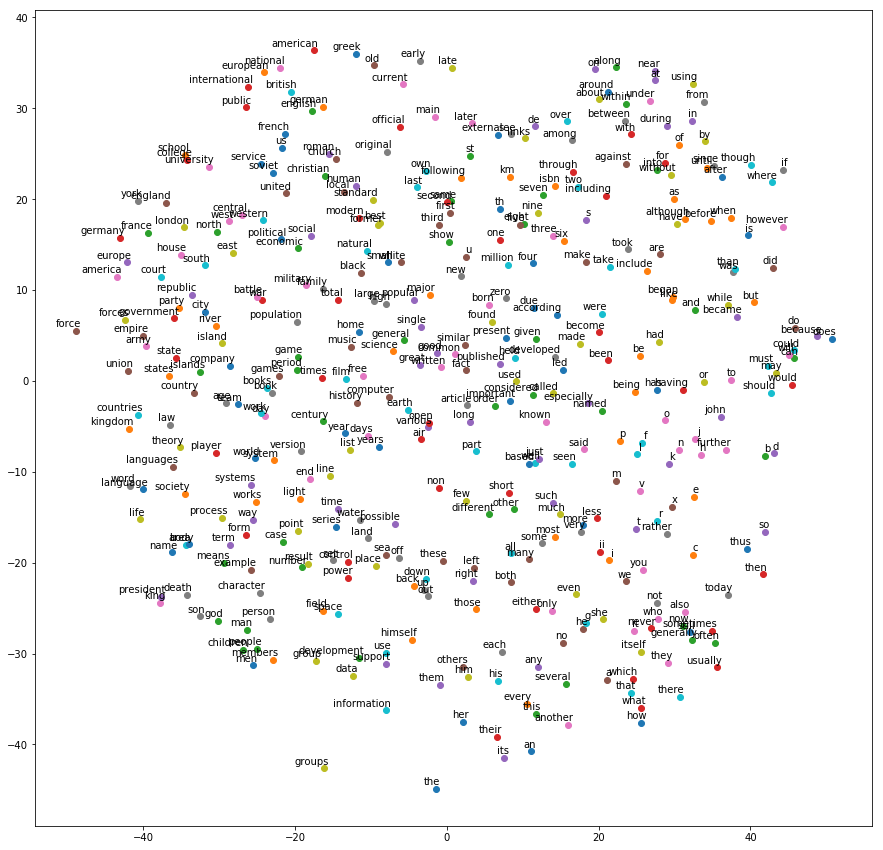

In [17]:
def plot(embeddings, labels):
    assert embeddings.shape[0] >= len(labels), 'More labels than embeddings'
    pylab.figure(figsize=(15,15))  # in inches
    for i, label in enumerate(labels):
        x, y = embeddings[i,:]
        pylab.scatter(x, y)
        pylab.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points',
                   ha='right', va='bottom')
    pylab.show()

words = [reverse_dictionary[i] for i in range(1, num_points+1)]
plot(two_d_embeddings, words)

In [9]:
# Problem

batch_size = 128
embedding_size = 128 # Dimension of the embedding vector.
skip_window = 1 # How many words to consider left and right.
num_skips = 2 # How many times to reuse an input to generate a label.
# We pick a random validation set to sample nearest neighbors. here we limit the
# validation samples to the words that have a low numeric ID, which by
# construction are also the most frequent. 
valid_size = 16 # Random set of words to evaluate similarity on.
valid_window = 100 # Only pick dev samples in the head of the distribution.
valid_examples = np.array(random.sample(range(valid_window), valid_size))
num_sampled = 64 # Number of negative examples to sample.

graph = tf.Graph()

with graph.as_default(), tf.device('/cpu:0'):

    # Input data.
    train_dataset = tf.placeholder(tf.int32, shape=[batch_size])
    train_labels = tf.placeholder(tf.int32, shape=[batch_size, 1])
    valid_dataset = tf.constant(valid_examples, dtype=tf.int32)

    # Variables.
    embeddings = tf.Variable(
    tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0))
    softmax_weights = tf.Variable(
    tf.truncated_normal([vocabulary_size, embedding_size],
                         stddev=1.0 / math.sqrt(embedding_size)))
    softmax_biases = tf.Variable(tf.zeros([vocabulary_size]))

    # Model.
    # Look up embeddings for inputs.
    embed = tf.nn.embedding_lookup(embeddings, train_dataset)
    # Compute the softmax loss, using a sample of the negative labels each time.
    loss = tf.reduce_mean(
    tf.nn.sampled_softmax_loss(weights=softmax_weights, biases=softmax_biases, inputs=embed,
                               labels=train_labels, num_sampled=num_sampled, num_classes=vocabulary_size))

    # Optimizer.
    # Note: The optimizer will optimize the softmax_weights AND the embeddings.
    # This is because the embeddings are defined as a variable quantity and the
    # optimizer's `minimize` method will by default modify all variable quantities 
    # that contribute to the tensor it is passed.
    # See docs on `tf.train.Optimizer.minimize()` for more details.
    optimizer = tf.train.AdagradOptimizer(1.0).minimize(loss)

    # Compute the similarity between minibatch examples and all embeddings.
    # We use the cosine distance:
    norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), 1, keep_dims=True))
    normalized_embeddings = embeddings / norm
    valid_embeddings = tf.nn.embedding_lookup(    normalized_embeddings, valid_dataset)
    similarity = tf.matmul(valid_embeddings, tf.transpose(normalized_embeddings))